<a href="https://colab.research.google.com/github/Sajithpemarathna/Energy-Consumption-Data-in-Germany-1995-2020-/blob/main/LSTM_Model_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Load the transformed dataset
df_long = pd.read_csv("Transformed_Energy_Consumption.csv")

# Define features and target variable
features = ["Year", "Energy Carriers", "Lag_1", "Lag_2", "Lag_3", "Rolling_3", "Rolling_5"]
target = "Energy Consumption"

# Train-Test Split (1995-2015 for training, 2016-2020 for validation)
train_df = df_long[df_long["Year"] <= 2015]
test_df = df_long[(df_long["Year"] > 2015) & (df_long["Year"] <= 2020)]

X_train, y_train = train_df[features], train_df[target]
X_test, y_test = test_df[features], test_df[target]

# Train XGBoost Model
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Display Results
print(f"✅ XGBoost Model Performance:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.4f}")

# Predict Future Consumption (2021-2030)
future_years = np.arange(2021, 2031)
future_predictions = []

for year in future_years:
    for carrier in df_long["Energy Carriers"].unique():
        last_known = df_long[(df_long["Year"] == year - 1) & (df_long["Energy Carriers"] == carrier)]
        if not last_known.empty:
            new_row = {
                "Year": year,
                "Energy Carriers": carrier,
                "Lag_1": last_known["Energy Consumption"].values[0],
                "Lag_2": last_known["Lag_1"].values[0],
                "Lag_3": last_known["Lag_2"].values[0],
                "Rolling_3": np.mean([last_known["Lag_1"].values[0], last_known["Lag_2"].values[0], last_known["Lag_3"].values[0]]),
                "Rolling_5": np.mean([last_known["Lag_1"].values[0], last_known["Lag_2"].values[0], last_known["Lag_3"].values[0], last_known["Rolling_3"].values[0]])
            }
            future_predictions.append(new_row)

future_df = pd.DataFrame(future_predictions)
future_df["Predicted Consumption"] = xgb_model.predict(future_df[features])

# Save predictions
future_df.to_csv("XGBoost_Future_Predictions.csv", index=False)

# Display first few rows of the predictions
future_df.head()


✅ XGBoost Model Performance:
MSE: 301112999.18
RMSE: 17352.61
MAPE: 25.7620


,Year,Energy Carriers,Lag_1,Lag_2,Lag_3,Rolling_3,Rolling_5,Predicted Consumption
0,2021,0,169314.0,3385.0,396516.0,1.335260e+05,1.475791e+05,7.580884e+04
1,2021,1,675.0,1065850.0,7864.0,3.713143e+05,3.680182e+05,5.398707e+03
2,2021,2,3575595.0,3710129.0,3731743.0,3.801268e+06,3.769074e+06,3.972820e+06
3,2021,3,56631.0,52115.0,7394.0,2.013700e+04,2.478108e+04,-2.468579e+04
4,2021,4,15051.0,29956.0,60202.0,3.826333e+04,3.746492e+04,6.009832e+04


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Load the transformed dataset
df_long = pd.read_csv("Transformed_Energy_Consumption.csv")

# Define features and target variable
features = ["Year", "Energy Carriers", "Lag_1", "Lag_2", "Lag_3", "Rolling_3", "Rolling_5"]
target = "Energy Consumption"

# Train-Test Split (1995-2015 for training, 2016-2020 for validation)
train_df = df_long[df_long["Year"] <= 2015]
test_df = df_long[(df_long["Year"] > 2015) & (df_long["Year"] <= 2020)]

X_train, y_train = train_df[features], train_df[target]
X_test, y_test = test_df[features], test_df[target]

# Train XGBoost Model (Updated with Regularization)
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    random_state=42,
    objective="reg:squarederror",  # Ensures stable regression
    min_child_weight=3,  # Prevents small noisy values from affecting predictions
    subsample=0.8,  # Prevents overfitting
)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Prevent negative values
y_pred = np.maximum(y_pred, 0)

# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Display Results
print(f"✅ XGBoost Model Performance (Updated with Non-Negative Outputs):")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.4f}")

# Predict Future Consumption (2021-2030)
future_years = np.arange(2021, 2031)
future_predictions = []

for year in future_years:
    for carrier in df_long["Energy Carriers"].unique():
        last_known = df_long[(df_long["Year"] == year - 1) & (df_long["Energy Carriers"] == carrier)]
        if not last_known.empty:
            new_row = {
                "Year": year,
                "Energy Carriers": carrier,
                "Lag_1": last_known["Energy Consumption"].values[0],
                "Lag_2": last_known["Lag_1"].values[0],
                "Lag_3": last_known["Lag_2"].values[0],
                "Rolling_3": np.mean([last_known["Lag_1"].values[0], last_known["Lag_2"].values[0], last_known["Lag_3"].values[0]]),
                "Rolling_5": np.mean([last_known["Lag_1"].values[0], last_known["Lag_2"].values[0], last_known["Lag_3"].values[0], last_known["Rolling_3"].values[0]])
            }
            future_predictions.append(new_row)

future_df = pd.DataFrame(future_predictions)
future_df["Predicted Consumption"] = xgb_model.predict(future_df[features])

# Prevent negative values in future predictions
future_df["Predicted Consumption"] = np.maximum(future_df["Predicted Consumption"], 0)

# Save predictions
future_df.to_csv("XGBoost_Future_Predictions_Updated.csv", index=False)

# Display first few rows of the predictions
future_df.head()


✅ XGBoost Model Performance (Updated with Non-Negative Outputs):
MSE: 307005899.73
RMSE: 17521.58
MAPE: 26.2721


,Year,Energy Carriers,Lag_1,Lag_2,Lag_3,Rolling_3,Rolling_5,Predicted Consumption
0,2021,0,169314.0,3385.0,396516.0,1.335260e+05,1.475791e+05,8.692742e+04
1,2021,1,675.0,1065850.0,7864.0,3.713143e+05,3.680182e+05,1.149820e+04
2,2021,2,3575595.0,3710129.0,3731743.0,3.801268e+06,3.769074e+06,3.943706e+06
3,2021,3,56631.0,52115.0,7394.0,2.013700e+04,2.478108e+04,0.000000e+00
4,2021,4,15051.0,29956.0,60202.0,3.826333e+04,3.746492e+04,6.272052e+04


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Load Transformed Dataset
df_long = pd.read_csv("Transformed_Energy_Consumption.csv")

# Define Features (Exclude Target)
features = ["Lag_1", "Lag_2", "Lag_3", "Rolling_3", "Rolling_5"]
target = "Energy Consumption"

# Normalize Data
scaler = MinMaxScaler()
df_long[features] = scaler.fit_transform(df_long[features])

# Prepare Sequential Data (Use 10 years to predict next year)
def create_sequences(data, seq_length=10):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :])  # Only features
        y.append(data[i+seq_length, -1])  # Predict next year's energy consumption
    return np.array(X), np.array(y)

# Convert Data to NumPy Array
data_array = df_long[features].values

# Prepare Data for LSTM
seq_length = 10
X, y = create_sequences(data_array, seq_length)

# Split Data (Train: 1995-2015, Test: 2016-2020)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Fix Input Shape in Model Definition
input_shape = (seq_length, len(features))  # Corrected input shape

# Build LSTM Model
lstm_model = Sequential([
    LSTM(100, activation="relu", return_sequences=True, input_shape=input_shape),
    Dropout(0.2),
    LSTM(50, activation="relu"),
    Dropout(0.2),
    Dense(1)
])
lstm_model.compile(optimizer="adam", loss="mse")
lstm_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Predict & Evaluate
y_pred = lstm_model.predict(X_test)
y_pred = scaler.inverse_transform([[0, 0, 0, 0, pred] for pred in y_pred[:, 0]])[:, -1]
y_test = scaler.inverse_transform([[0, 0, 0, 0, actual] for actual in y_test])[:, -1]

# Compute Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"✅ LSTM Model Performance (Fixed Input Shape):")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.4f}")

# Forecast Future Energy Consumption (2021-2030)
future_predictions = []
input_seq = X[-1].reshape(1, seq_length, len(features))  # Start with last known sequence

for year in range(2021, 2031):
    pred = lstm_model.predict(input_seq)[0][0]
    future_predictions.append({"Year": year, "Predicted Consumption": pred})

    # Update input sequence (shift and append new prediction)
    new_entry = np.append(input_seq[:, 1:, :], [[[0, 0, 0, 0, pred]]], axis=1)
    input_seq = new_entry

# Convert & Save Future Predictions
future_df = pd.DataFrame(future_predictions)
future_df["Predicted Consumption"] = scaler.inverse_transform([[0, 0, 0, 0, pred] for pred in future_df["Predicted Consumption"]])[:, -1]
future_df.to_csv("LSTM_Future_Predictions.csv", index=False)

# Display Future Predictions
future_df.head()


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


432/432 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - loss: 0.0021 - val_loss: 8.9410e-05
Epoch 2/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.0013 - val_loss: 1.6746e-04
Epoch 3/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.0011 - val_loss: 2.0997e-04
Epoch 4/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - loss: 8.7894e-04 - val_loss: 5.9783e-05
Epoch 5/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 6.8973e-04 - val_loss: 6.4143e-05
Epoch 6/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0010 - val_loss: 7.1984e-05
Epoch 7/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 7.2254e-04 - val_loss: 5.2805e-05
Epoch 8/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0012 - val_loss: 1.1793e-04
Epoch 9/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 6.2363e-04 - val_loss: 5.9447e-05
Epoch 10/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.0010 - val_loss: 5.1046e-05
Epoch 11/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 4.4450e-04 - val_lo

,Year,Predicted Consumption
0,2021,11856.355106
1,2022,11774.619055
2,2023,11679.505608
3,2024,11676.065388
4,2025,11698.216176


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Load Transformed Dataset
df_long = pd.read_csv("Transformed_Energy_Consumption.csv")

# Define Features (Exclude Target)
features = ["Lag_1", "Lag_2", "Lag_3", "Rolling_3", "Rolling_5"]
target = "Energy Consumption"

# Normalize Data (Fix: Scale training set only)
scaler = MinMaxScaler()
train_data = df_long[df_long["Year"] <= 2015]
test_data = df_long[df_long["Year"] > 2015]

scaler.fit(train_data[features])  # Fit only on training data
df_long[features] = scaler.transform(df_long[features])  # Apply scaling

# Prepare Sequential Data (Use 15 years instead of 10)
def create_sequences(data, seq_length=15):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :])  # Only features
        y.append(data[i+seq_length, -1])  # Predict next year's energy consumption
    return np.array(X), np.array(y)

# Convert Data to NumPy Array
data_array = df_long[features].values

# Prepare Data for LSTM
seq_length = 15  # Increased sequence length
X, y = create_sequences(data_array, seq_length)

# Split Data (Train: 1995-2015, Test: 2016-2020)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Fix Input Shape in Model Definition
input_shape = (seq_length, len(features))  # Corrected input shape

# Build LSTM Model (More Neurons & Layers)
lstm_model = Sequential([
    LSTM(200, activation="relu", return_sequences=True, input_shape=input_shape),
    Dropout(0.3),  # Increased dropout
    LSTM(100, activation="relu", return_sequences=True),
    Dropout(0.3),
    LSTM(50, activation="relu"),
    Dense(25, activation="relu"),  # Additional Dense Layer
    Dropout(0.2),
    Dense(1)
])
lstm_model.compile(optimizer="adam", loss="mse")
lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predict & Evaluate
y_pred = lstm_model.predict(X_test)
y_pred = scaler.inverse_transform([[0, 0, 0, 0, pred] for pred in y_pred[:, 0]])[:, -1]
y_test = scaler.inverse_transform([[0, 0, 0, 0, actual] for actual in y_test])[:, -1]

# Compute Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"✅ LSTM Model Performance (Improved):")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.4f}")

# Forecast Future Energy Consumption (2021-2030)
future_predictions = []
input_seq = X[-1].reshape(1, seq_length, len(features))  # Start with last known sequence

for year in range(2021, 2031):
    pred = lstm_model.predict(input_seq)[0][0]
    future_predictions.append({"Year": year, "Predicted Consumption": pred})

    # Update input sequence (shift and append new prediction)
    new_entry = np.append(input_seq[:, 1:, :], [[[0, 0, 0, 0, pred]]], axis=1)
    input_seq = new_entry

# Convert & Save Future Predictions
future_df = pd.DataFrame(future_predictions)
future_df["Predicted Consumption"] = scaler.inverse_transform([[0, 0, 0, 0, pred] for pred in future_df["Predicted Consumption"]])[:, -1]
future_df.to_csv("LSTM_Future_Predictions_Updated.csv", index=False)

# Display Future Predictions
future_df.head()


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


216/216 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step - loss: 0.0029 - val_loss: 1.1593e-04
Epoch 2/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 17s 77ms/step - loss: 0.0019 - val_loss: 1.6049e-04
Epoch 3/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 23s 86ms/step - loss: 0.0031 - val_loss: 2.4190e-04
Epoch 4/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 18s 77ms/step - loss: 8.5142e-04 - val_loss: 1.0941e-04
Epoch 5/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 22s 84ms/step - loss: 0.0051 - val_loss: 1.8133e-04
Epoch 6/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 16s 76ms/step - loss: 0.0021 - val_loss: 1.0113e-04
Epoch 7/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 17s 77ms/step - loss: 0.0022 - val_loss: 1.0464e-04
Epoch 8/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 17s 78ms/step - loss: 0.0020 - val_loss: 1.2333e-04
Epoch 9/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - loss: 0.0091 - val_loss: 1.0312e-04
Epoch 10/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 20s 77ms/step - loss: 0.0014 - val_loss: 1.0405e-04
Epoch 11/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 17s 79ms/step - loss: 9.1396e-04 - 

,Year,Predicted Consumption
0,2021,20703.213960
1,2022,20860.745988
2,2023,20896.590961
3,2024,20848.981439
4,2025,20778.102919


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Bidirectional, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Load Transformed Dataset
df_long = pd.read_csv("Transformed_Energy_Consumption.csv")

# Define Features (Exclude Target)
features = ["Lag_1", "Lag_2", "Lag_3", "Rolling_3", "Rolling_5"]
target = "Energy Consumption"

# Normalize Data (Scale training set only)
scaler = MinMaxScaler()
train_data = df_long[df_long["Year"] <= 2015]
test_data = df_long[df_long["Year"] > 2015]

scaler.fit(train_data[features])  # Fit only on training data
df_long[features] = scaler.transform(df_long[features])  # Apply scaling

# Prepare Sequential Data (Use 15 years instead of 10)
def create_sequences(data, seq_length=15):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :])  # Only features
        y.append(data[i+seq_length, -1])  # Predict next year's energy consumption
    return np.array(X), np.array(y)

# Convert Data to NumPy Array
data_array = df_long[features].values

# Prepare Data for Bi-GRU
seq_length = 15
X, y = create_sequences(data_array, seq_length)

# Split Data (Train: 1995-2015, Test: 2016-2020)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Fix Input Shape in Model Definition
input_shape = (seq_length, len(features))  # Corrected input shape

# Build Bi-GRU Model
bi_gru_model = Sequential([
    Bidirectional(GRU(200, activation="relu", return_sequences=True), input_shape=input_shape),
    Dropout(0.3),
    Bidirectional(GRU(100, activation="relu", return_sequences=True)),
    Dropout(0.3),
    Bidirectional(GRU(50, activation="relu")),
    Dense(25, activation="relu"),
    Dropout(0.2),
    Dense(1)
])
bi_gru_model.compile(optimizer="adam", loss="mse")
bi_gru_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predict & Evaluate
y_pred = bi_gru_model.predict(X_test)
y_pred = scaler.inverse_transform([[0, 0, 0, 0, pred] for pred in y_pred[:, 0]])[:, -1]
y_test = scaler.inverse_transform([[0, 0, 0, 0, actual] for actual in y_test])[:, -1]

# Compute Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"✅ Bi-GRU Model Performance:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.4f}")

# Forecast Future Energy Consumption (2021-2030)
future_predictions = []
input_seq = X[-1].reshape(1, seq_length, len(features))  # Start with last known sequence

for year in range(2021, 2031):
    pred = bi_gru_model.predict(input_seq)[0][0]
    future_predictions.append({"Year": year, "Predicted Consumption": pred})

    # Update input sequence (shift and append new prediction)
    new_entry = np.append(input_seq[:, 1:, :], [[[0, 0, 0, 0, pred]]], axis=1)
    input_seq = new_entry

# Convert & Save Future Predictions
future_df = pd.DataFrame(future_predictions)
future_df["Predicted Consumption"] = scaler.inverse_transform([[0, 0, 0, 0, pred] for pred in future_df["Predicted Consumption"]])[:, -1]
future_df.to_csv("BiGRU_Future_Predictions.csv", index=False)

# Display Future Predictions
future_df.head()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 52s 172ms/step - loss: 0.0021 - val_loss: 5.0851e-05
Epoch 2/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 40s 168ms/step - loss: 0.0014 - val_loss: 7.7219e-05
Epoch 3/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 41s 168ms/step - loss: 5.8289e-04 - val_loss: 3.8815e-05
Epoch 4/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 41s 167ms/step - loss: 0.0011 - val_loss: 3.7411e-05
Epoch 5/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 39s 160ms/step - loss: 4.1592e-04 - val_loss: 3.9659e-05
Epoch 6/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 37s 171ms/step - loss: 3.3714e-04 - val_loss: 7.4880e-05
Epoch 7/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 41s 172ms/step - loss: 4.7097e-04 - val_loss: 5.9599e-05
Epoch 8/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 40s 169ms/step - loss: 3.0338e-04 - val_loss: 3.6051e-05
Epoch 9/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 34s 159ms/step - loss: 3.5133e-04 - val_loss: 6.2964e-05
Epoch 10/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 41s 158ms/step - loss: 7.8197e-04 - val_loss: 8.1254e-05
Epoch 11/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 

,Year,Predicted Consumption
0,2021,7577.782807
1,2022,7324.262549
2,2023,7097.630466
3,2024,6967.111105
4,2025,6911.131680


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Bidirectional, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Load Transformed Dataset
df_long = pd.read_csv("Transformed_Energy_Consumption.csv")

# Define Features (Exclude Target)
features = ["Lag_1", "Lag_2", "Lag_3", "Rolling_3", "Rolling_5"]
target = "Energy Consumption"

# Normalize Data (Scale training set only)
scaler = MinMaxScaler()
train_data = df_long[df_long["Year"] <= 2015]
test_data = df_long[df_long["Year"] > 2015]

scaler.fit(train_data[features])  # Fit only on training data
df_long[features] = scaler.transform(df_long[features])  # Apply scaling

# Prepare Sequential Data (Use 15 years instead of 10)
def create_sequences(data, seq_length=15):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :])  # Only features
        y.append(data[i+seq_length, -1])  # Predict next year's energy consumption
    return np.array(X), np.array(y)

# Convert Data to NumPy Array
data_array = df_long[features].values

# Prepare Data for Bi-GRU
seq_length = 15
X, y = create_sequences(data_array, seq_length)

# Split Data (Train: 1995-2015, Test: 2016-2020)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Fix Input Shape in Model Definition
input_shape = (seq_length, len(features))  # Corrected input shape

# Define Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
model_checkpoint = ModelCheckpoint("best_bi_gru_model.h5", save_best_only=True)

# Build Improved Bi-GRU Model
bi_gru_model = Sequential([
    Bidirectional(GRU(256, activation="relu", return_sequences=True), input_shape=input_shape),
    Dropout(0.3),
    Bidirectional(GRU(128, activation="relu", return_sequences=True)),
    Dropout(0.3),
    Bidirectional(GRU(64, activation="relu")),
    Dense(32, activation="relu"),
    Dropout(0.2),
    Dense(1)
])

bi_gru_model.compile(optimizer="adam", loss="mse")
bi_gru_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,  # Increased batch size
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr, model_checkpoint],  # Use Callbacks
    verbose=1
)

# Predict & Evaluate
y_pred = bi_gru_model.predict(X_test)
y_pred = scaler.inverse_transform([[0, 0, 0, 0, pred] for pred in y_pred[:, 0]])[:, -1]
y_test = scaler.inverse_transform([[0, 0, 0, 0, actual] for actual in y_test])[:, -1]

# Compute Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"✅ Improved Bi-GRU Model Performance:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.4f}")

# Forecast Future Energy Consumption (2021-2030)
future_predictions = []
input_seq = X[-1].reshape(1, seq_length, len(features))  # Start with last known sequence

for year in range(2021, 2031):
    pred = bi_gru_model.predict(input_seq)[0][0]
    future_predictions.append({"Year": year, "Predicted Consumption": pred})

    # Update input sequence (shift and append new prediction)
    new_entry = np.append(input_seq[:, 1:, :], [[[0, 0, 0, 0, pred]]], axis=1)
    input_seq = new_entry

# Convert & Save Future Predictions
future_df = pd.DataFrame(future_predictions)
future_df["Predicted Consumption"] = scaler.inverse_transform([[0, 0, 0, 0, pred] for pred in future_df["Predicted Consumption"]])[:, -1]
future_df.to_csv("Improved_BiGRU_Future_Predictions.csv", index=False)

# Display Future Predictions
future_df.head()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - loss: 0.0016

108/108 ━━━━━━━━━━━━━━━━━━━━ 49s 320ms/step - loss: 0.0016 - val_loss: 9.9621e-05 - learning_rate: 0.0010
Epoch 2/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - loss: 8.6082e-04

108/108 ━━━━━━━━━━━━━━━━━━━━ 35s 325ms/step - loss: 8.5993e-04 - val_loss: 9.4735e-05 - learning_rate: 0.0010
Epoch 3/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - loss: 7.9626e-04

108/108 ━━━━━━━━━━━━━━━━━━━━ 34s 316ms/step - loss: 7.9640e-04 - val_loss: 5.6430e-05 - learning_rate: 0.0010
Epoch 4/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 35s 322ms/step - loss: 7.1945e-04 - val_loss: 8.8305e-05 - learning_rate: 0.0010
Epoch 5/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - loss: 2.8258e-04

108/108 ━━━━━━━━━━━━━━━━━━━━ 33s 310ms/step - loss: 2.8415e-04 - val_loss: 3.8900e-05 - learning_rate: 0.0010
Epoch 6/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - loss: 4.9732e-04
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.


108/108 ━━━━━━━━━━━━━━━━━━━━ 34s 312ms/step - loss: 4.9697e-04 - val_loss: 3.6281e-05 - learning_rate: 0.0010
Epoch 7/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 40s 307ms/step - loss: 5.3725e-04 - val_loss: 3.9805e-05 - learning_rate: 5.0000e-04
Epoch 8/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - loss: 4.1075e-04

108/108 ━━━━━━━━━━━━━━━━━━━━ 41s 306ms/step - loss: 4.1094e-04 - val_loss: 2.9324e-05 - learning_rate: 5.0000e-04
Epoch 9/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - loss: 4.0870e-04

108/108 ━━━━━━━━━━━━━━━━━━━━ 41s 310ms/step - loss: 4.0920e-04 - val_loss: 2.4800e-05 - learning_rate: 5.0000e-04
Epoch 10/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 34s 314ms/step - loss: 7.1050e-04 - val_loss: 2.6460e-05 - learning_rate: 5.0000e-04
Epoch 11/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - loss: 4.4257e-04
Epoch 11: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
108/108 ━━━━━━━━━━━━━━━━━━━━ 32s 299ms/step - loss: 4.4303e-04 - val_loss: 2.7086e-05 - learning_rate: 5.0000e-04
Epoch 12/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - loss: 2.8699e-04

108/108 ━━━━━━━━━━━━━━━━━━━━ 42s 307ms/step - loss: 2.8774e-04 - val_loss: 2.4171e-05 - learning_rate: 2.5000e-04
Epoch 13/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - loss: 2.6765e-04

108/108 ━━━━━━━━━━━━━━━━━━━━ 34s 314ms/step - loss: 2.6780e-04 - val_loss: 2.3466e-05 - learning_rate: 2.5000e-04
Epoch 14/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 41s 317ms/step - loss: 3.8163e-04 - val_loss: 2.4550e-05 - learning_rate: 2.5000e-04
Epoch 15/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 32s 296ms/step - loss: 3.6961e-04 - val_loss: 2.5747e-05 - learning_rate: 2.5000e-04
Epoch 16/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - loss: 3.5489e-04
Epoch 16: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
108/108 ━━━━━━━━━━━━━━━━━━━━ 33s 306ms/step - loss: 3.5589e-04 - val_loss: 2.7972e-05 - learning_rate: 2.5000e-04
Epoch 17/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 41s 309ms/step - loss: 6.4745e-04 - val_loss: 2.4702e-05 - learning_rate: 1.2500e-04
Epoch 18/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - loss: 5.1362e-04

108/108 ━━━━━━━━━━━━━━━━━━━━ 41s 309ms/step - loss: 5.1237e-04 - val_loss: 2.2631e-05 - learning_rate: 1.2500e-04
Epoch 19/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 40s 302ms/step - loss: 3.8873e-04 - val_loss: 2.3509e-05 - learning_rate: 1.2500e-04
Epoch 20/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 42s 312ms/step - loss: 5.8016e-04 - val_loss: 2.3724e-05 - learning_rate: 1.2500e-04
Epoch 21/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - loss: 2.8117e-04
Epoch 21: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
108/108 ━━━━━━━━━━━━━━━━━━━━ 40s 307ms/step - loss: 2.8192e-04 - val_loss: 2.4919e-05 - learning_rate: 1.2500e-04
Epoch 22/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 33s 303ms/step - loss: 3.8978e-04 - val_loss: 2.3515e-05 - learning_rate: 6.2500e-05
Epoch 23/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 41s 306ms/step - loss: 3.3047e-04 - val_loss: 2.4217e-05 - learning_rate: 6.2500e-05
Epoch 24/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - loss: 2.8610e-04

108/108 ━━━━━━━━━━━━━━━━━━━━ 42s 321ms/step - loss: 2.8673e-04 - val_loss: 2.1271e-05 - learning_rate: 6.2500e-05
Epoch 25/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 2.9929e-04 - val_loss: 2.3574e-05 - learning_rate: 6.2500e-05
Epoch 26/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - loss: 6.0538e-04
Epoch 26: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
108/108 ━━━━━━━━━━━━━━━━━━━━ 43s 330ms/step - loss: 6.0329e-04 - val_loss: 2.3692e-05 - learning_rate: 6.2500e-05
Epoch 27/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 33s 304ms/step - loss: 5.0195e-04 - val_loss: 2.2423e-05 - learning_rate: 3.1250e-05
Epoch 28/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 40s 297ms/step - loss: 3.0311e-04 - val_loss: 2.2044e-05 - learning_rate: 3.1250e-05
Epoch 29/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 42s 305ms/step - loss: 2.4905e-04 - val_loss: 2.2598e-05 - learning_rate: 3.1250e-05
Epoch 30/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 35s 328ms/step - loss: 3.1813e-04 - val_loss: 2.2453e-05 - learning_ra

,Year,Predicted Consumption
0,2021,7992.872211
1,2022,7868.277363
2,2023,7781.070307
3,2024,7695.272685
4,2025,7615.201721


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GRU, Bidirectional, Dense, Dropout, Input, Attention
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Load Transformed Dataset
df_long = pd.read_csv("Transformed_Energy_Consumption.csv")

# Define Features (Exclude Target)
features = ["Lag_1", "Lag_2", "Lag_3", "Rolling_3", "Rolling_5"]
target = "Energy Consumption"

# Normalize Data (Scale training set only)
scaler = MinMaxScaler()
train_data = df_long[df_long["Year"] <= 2015]
test_data = df_long[df_long["Year"] > 2015]

scaler.fit(train_data[features])  # Fit only on training data
df_long[features] = scaler.transform(df_long[features])  # Apply scaling

# Prepare Sequential Data (Use 20 years instead of 15)
def create_sequences(data, seq_length=20):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :])  # Only features
        y.append(data[i+seq_length, -1])  # Predict next year's energy consumption
    return np.array(X), np.array(y)

# Convert Data to NumPy Array
data_array = df_long[features].values

# Prepare Data for Bi-GRU
seq_length = 20  # Increased sequence length
X, y = create_sequences(data_array, seq_length)

# Split Data (Train: 1995-2015, Test: 2016-2020)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Fix Input Shape in Model Definition
input_shape = (seq_length, len(features))  # Corrected input shape

# Define Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
model_checkpoint = ModelCheckpoint("best_advanced_bi_gru_model.h5", save_best_only=True)

# Custom Attention Layer
class AttentionLayer(tf.keras.layers.Layer):
    def __init__(self):
        super(AttentionLayer, self).__init__()

    def build(self, input_shape):
        self.W = self.add_weight(shape=(input_shape[-1], input_shape[-1]), initializer="random_normal", trainable=True)
        self.b = self.add_weight(shape=(input_shape[-1],), initializer="zeros", trainable=True)

    def call(self, inputs):
        score = tf.nn.tanh(tf.tensordot(inputs, self.W, axes=1) + self.b)
        attention_weights = tf.nn.softmax(score, axis=1)
        return inputs * attention_weights

# Build Improved Bi-GRU Model with Attention
inputs = Input(shape=input_shape)
x = Bidirectional(GRU(256, activation="relu", return_sequences=True))(inputs)
x = Dropout(0.3)(x)
x = AttentionLayer()(x)  # Apply Attention
x = Bidirectional(GRU(128, activation="relu", return_sequences=True))(x)
x = Dropout(0.3)(x)
x = Bidirectional(GRU(64, activation="relu"))(x)
x = Dense(32, activation="relu")(x)
x = Dropout(0.2)(x)
outputs = Dense(1)(x)

bi_gru_model = Model(inputs, outputs)
bi_gru_model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=1e-4), loss="mse")
bi_gru_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,  # Increased batch size
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr, model_checkpoint],  # Use Callbacks
    verbose=1
)

# Predict & Evaluate
y_pred = bi_gru_model.predict(X_test)
y_pred = scaler.inverse_transform([[0, 0, 0, 0, pred] for pred in y_pred[:, 0]])[:, -1]
y_test = scaler.inverse_transform([[0, 0, 0, 0, actual] for actual in y_test])[:, -1]

# Compute Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"✅ Advanced Bi-GRU Model Performance:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.4f}")

# Forecast Future Energy Consumption (2021-2030)
future_predictions = []
input_seq = X[-1].reshape(1, seq_length, len(features))  # Start with last known sequence

for year in range(2021, 2031):
    pred = bi_gru_model.predict(input_seq)[0][0]
    future_predictions.append({"Year": year, "Predicted Consumption": pred})

    # Update input sequence (shift and append new prediction)
    new_entry = np.append(input_seq[:, 1:, :], [[[0, 0, 0, 0, pred]]], axis=1)
    input_seq = new_entry

# Convert & Save Future Predictions
future_df = pd.DataFrame(future_predictions)
future_df["Predicted Consumption"] = scaler.inverse_transform([[0, 0, 0, 0, pred] for pred in future_df["Predicted Consumption"]])[:, -1]
future_df.to_csv("Advanced_BiGRU_Future_Predictions.csv", index=False)

# Display Future Predictions
future_df.head()


Epoch 1/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - loss: 0.0024

108/108 ━━━━━━━━━━━━━━━━━━━━ 71s 477ms/step - loss: 0.0024 - val_loss: 1.5864e-04 - learning_rate: 1.0000e-04
Epoch 2/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step - loss: 0.0033

108/108 ━━━━━━━━━━━━━━━━━━━━ 82s 479ms/step - loss: 0.0033 - val_loss: 1.1495e-04 - learning_rate: 1.0000e-04
Epoch 3/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - loss: 0.0018

108/108 ━━━━━━━━━━━━━━━━━━━━ 52s 481ms/step - loss: 0.0018 - val_loss: 9.6395e-05 - learning_rate: 1.0000e-04
Epoch 4/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step - loss: 0.0016

108/108 ━━━━━━━━━━━━━━━━━━━━ 81s 472ms/step - loss: 0.0016 - val_loss: 6.6546e-05 - learning_rate: 1.0000e-04
Epoch 5/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - loss: 7.1398e-04

108/108 ━━━━━━━━━━━━━━━━━━━━ 84s 493ms/step - loss: 7.1523e-04 - val_loss: 6.4395e-05 - learning_rate: 1.0000e-04
Epoch 6/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - loss: 7.1364e-04
Epoch 6: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
108/108 ━━━━━━━━━━━━━━━━━━━━ 78s 454ms/step - loss: 7.1386e-04 - val_loss: 6.5117e-05 - learning_rate: 1.0000e-04
Epoch 7/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - loss: 8.0895e-04

108/108 ━━━━━━━━━━━━━━━━━━━━ 84s 475ms/step - loss: 8.0792e-04 - val_loss: 6.2005e-05 - learning_rate: 5.0000e-05
Epoch 8/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 82s 473ms/step - loss: 8.0969e-04 - val_loss: 6.4126e-05 - learning_rate: 5.0000e-05
Epoch 9/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step - loss: 9.5251e-04

108/108 ━━━━━━━━━━━━━━━━━━━━ 84s 492ms/step - loss: 9.5125e-04 - val_loss: 5.9348e-05 - learning_rate: 5.0000e-05
Epoch 10/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - loss: 8.3287e-04

108/108 ━━━━━━━━━━━━━━━━━━━━ 52s 478ms/step - loss: 8.3221e-04 - val_loss: 5.3685e-05 - learning_rate: 5.0000e-05
Epoch 11/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 82s 481ms/step - loss: 7.2484e-04 - val_loss: 6.0444e-05 - learning_rate: 5.0000e-05
Epoch 12/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - loss: 4.3345e-04

108/108 ━━━━━━━━━━━━━━━━━━━━ 83s 489ms/step - loss: 4.3595e-04 - val_loss: 5.2933e-05 - learning_rate: 5.0000e-05
Epoch 13/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - loss: 3.8407e-04

108/108 ━━━━━━━━━━━━━━━━━━━━ 79s 456ms/step - loss: 3.8627e-04 - val_loss: 5.0604e-05 - learning_rate: 5.0000e-05
Epoch 14/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 81s 448ms/step - loss: 6.6637e-04 - val_loss: 5.2941e-05 - learning_rate: 5.0000e-05
Epoch 15/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - loss: 4.1404e-04
Epoch 15: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
108/108 ━━━━━━━━━━━━━━━━━━━━ 85s 475ms/step - loss: 4.1513e-04 - val_loss: 5.4064e-05 - learning_rate: 5.0000e-05
Epoch 16/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 48s 448ms/step - loss: 6.4199e-04 - val_loss: 5.3441e-05 - learning_rate: 2.5000e-05
Epoch 17/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step - loss: 7.5686e-04

108/108 ━━━━━━━━━━━━━━━━━━━━ 84s 469ms/step - loss: 7.5497e-04 - val_loss: 5.0182e-05 - learning_rate: 2.5000e-05
Epoch 18/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 50s 466ms/step - loss: 5.2067e-04 - val_loss: 5.4173e-05 - learning_rate: 2.5000e-05
Epoch 19/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 82s 470ms/step - loss: 5.8889e-04 - val_loss: 5.6246e-05 - learning_rate: 2.5000e-05
Epoch 20/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - loss: 6.2508e-04
Epoch 20: ReduceLROnPlateau reducing learning rate to 1.249999968422344e-05.
108/108 ━━━━━━━━━━━━━━━━━━━━ 84s 485ms/step - loss: 6.2417e-04 - val_loss: 5.3721e-05 - learning_rate: 2.5000e-05
Epoch 21/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 80s 463ms/step - loss: 3.5050e-04 - val_loss: 5.2912e-05 - learning_rate: 1.2500e-05
Epoch 22/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 80s 451ms/step - loss: 3.7466e-04 - val_loss: 5.0904e-05 - learning_rate: 1.2500e-05
Epoch 23/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 85s 477ms/step - loss: 3.0983e-04 - val_loss: 5.5761e-05 - learning_ra

108/108 ━━━━━━━━━━━━━━━━━━━━ 83s 485ms/step - loss: 0.0010 - val_loss: 4.7757e-05 - learning_rate: 1.2500e-05
Epoch 25/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - loss: 4.0837e-04
Epoch 25: ReduceLROnPlateau reducing learning rate to 6.24999984211172e-06.
108/108 ━━━━━━━━━━━━━━━━━━━━ 80s 465ms/step - loss: 4.0972e-04 - val_loss: 5.0847e-05 - learning_rate: 1.2500e-05
Epoch 26/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - loss: 5.6329e-04

108/108 ━━━━━━━━━━━━━━━━━━━━ 81s 453ms/step - loss: 5.6254e-04 - val_loss: 4.7694e-05 - learning_rate: 6.2500e-06
Epoch 27/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 81s 447ms/step - loss: 6.2047e-04 - val_loss: 4.8607e-05 - learning_rate: 6.2500e-06
Epoch 28/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - loss: 9.5478e-04Epoch 29/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 48s 447ms/step - loss: 4.2617e-04 - val_loss: 5.1836e-05 - learning_rate: 6.2500e-06
Epoch 30/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - loss: 3.6622e-04
Epoch 30: ReduceLROnPlateau reducing learning rate to 3.12499992105586e-06.
108/108 ━━━━━━━━━━━━━━━━━━━━ 85s 478ms/step - loss: 3.6785e-04 - val_loss: 4.8754e-05 - learning_rate: 6.2500e-06
Epoch 31/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 83s 487ms/step - loss: 4.8425e-04 - val_loss: 5.1436e-05 - learning_rate: 3.1250e-06
Epoch 32/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step - loss: 4.7975e-04

108/108 ━━━━━━━━━━━━━━━━━━━━ 83s 501ms/step - loss: 4.8054e-04 - val_loss: 4.7102e-05 - learning_rate: 3.1250e-06
Epoch 33/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - loss: 4.4932e-04

108/108 ━━━━━━━━━━━━━━━━━━━━ 81s 487ms/step - loss: 4.4996e-04 - val_loss: 4.6873e-05 - learning_rate: 3.1250e-06
Epoch 34/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 78s 455ms/step - loss: 7.2713e-04 - val_loss: 4.8805e-05 - learning_rate: 3.1250e-06
Epoch 35/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - loss: 5.8072e-04
Epoch 35: ReduceLROnPlateau reducing learning rate to 1.56249996052793e-06.
108/108 ━━━━━━━━━━━━━━━━━━━━ 84s 474ms/step - loss: 5.8147e-04 - val_loss: 4.6911e-05 - learning_rate: 3.1250e-06
Epoch 36/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 84s 491ms/step - loss: 6.7868e-04 - val_loss: 4.8612e-05 - learning_rate: 1.5625e-06
Epoch 37/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 52s 481ms/step - loss: 5.6348e-04 - val_loss: 4.8370e-05 - learning_rate: 1.5625e-06
Epoch 38/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 82s 482ms/step - loss: 5.5353e-04 - val_loss: 4.8078e-05 - learning_rate: 1.5625e-06
Epoch 39/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 49s 456ms/step - loss: 4.1323e-04 - val_loss: 4.7629e-05 - learning_rat

,Year,Predicted Consumption
0,2021,25444.567438
1,2022,21826.466098
2,2023,18400.136694
3,2024,17680.600672
4,2025,17360.365726


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GRU, Bidirectional, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Load Transformed Dataset
df_long = pd.read_csv("Transformed_Energy_Consumption.csv")

# Define Features (Exclude Target)
features = ["Lag_1", "Lag_2", "Lag_3", "Rolling_3", "Rolling_5"]
target = "Energy Consumption"

# Normalize Data (Scale training set only)
scaler = MinMaxScaler()
train_data = df_long[df_long["Year"] <= 2015]
test_data = df_long[df_long["Year"] > 2015]

scaler.fit(train_data[features])  # Fit only on training data
df_long[features] = scaler.transform(df_long[features])  # Apply scaling

# Prepare Sequential Data (Use 15 years instead of 20 for faster training)
def create_sequences(data, seq_length=15):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :])  # Only features
        y.append(data[i+seq_length, -1])  # Predict next year's energy consumption
    return np.array(X), np.array(y)

# Convert Data to NumPy Array
data_array = df_long[features].values

# Prepare Data for Bi-GRU
seq_length = 15  # Reduced for speed
X, y = create_sequences(data_array, seq_length)

# Split Data (Train: 1995-2015, Test: 2016-2020)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Fix Input Shape in Model Definition
input_shape = (seq_length, len(features))

# Define Callbacks for Faster Convergence
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Use CuDNN-GRU for Faster Training (Only Works on GPU)
inputs = Input(shape=input_shape)
x = Bidirectional(GRU(64, activation="relu", return_sequences=True, recurrent_activation="sigmoid", use_bias=True))(inputs)
x = Dropout(0.3)(x)
x = Bidirectional(GRU(32, activation="relu", recurrent_activation="sigmoid", use_bias=True))(x)
x = Dense(16, activation="relu")(x)
x = Dropout(0.2)(x)
outputs = Dense(1)(x)

fast_bi_gru_model = Model(inputs, outputs)
fast_bi_gru_model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=5e-4), loss="mse")

# Train Faster Model
fast_bi_gru_model.fit(
    X_train, y_train,
    epochs=50,  # Reduced epochs
    batch_size=32,  # Smaller batch size for faster updates
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Predict & Evaluate
y_pred = fast_bi_gru_model.predict(X_test)
y_pred = scaler.inverse_transform([[0, 0, 0, 0, pred] for pred in y_pred[:, 0]])[:, -1]
y_test = scaler.inverse_transform([[0, 0, 0, 0, actual] for actual in y_test])[:, -1]

# Compute Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"✅ Fast Bi-GRU Model Performance:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.4f}")

# Forecast Future Energy Consumption (2021-2030)
future_predictions = []
input_seq = X[-1].reshape(1, seq_length, len(features))  # Start with last known sequence

for year in range(2021, 2031):
    pred = fast_bi_gru_model.predict(input_seq)[0][0]
    future_predictions.append({"Year": year, "Predicted Consumption": pred})

    # Update input sequence (shift and append new prediction)
    new_entry = np.append(input_seq[:, 1:, :], [[[0, 0, 0, 0, pred]]], axis=1)
    input_seq = new_entry

# Convert & Save Future Predictions
future_df = pd.DataFrame(future_predictions)
future_df["Predicted Consumption"] = scaler.inverse_transform([[0, 0, 0, 0, pred] for pred in future_df["Predicted Consumption"]])[:, -1]
future_df.to_csv("Fast_BiGRU_Future_Predictions.csv", index=False)

# Display Future Predictions
future_df.head()


Epoch 1/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - loss: 0.0011 - val_loss: 4.5177e-05 - learning_rate: 5.0000e-04
Epoch 2/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.0012 - val_loss: 5.0145e-05 - learning_rate: 5.0000e-04
Epoch 3/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 4.7332e-04 - val_loss: 5.3312e-05 - learning_rate: 5.0000e-04
Epoch 4/50
215/216 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 7.4234e-04
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
216/216 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 7.4293e-04 - val_loss: 2.9186e-05 - learning_rate: 5.0000e-04
Epoch 5/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 5.6541e-04 - val_loss: 4.9793e-05 - learning_rate: 2.5000e-04
Epoch 6/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - loss: 5.2992e-04 - val_loss: 2.8479e-05 - learning_rate: 2.5000e-04
Epoch 7/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 6.1035e-04
Epoch 7: ReduceLROnPlateau reducing learning rate to 0.000

,Year,Predicted Consumption
0,2021,8287.021514
1,2022,7892.046555
2,2023,7525.064643
3,2024,7406.427655
4,2025,7197.097819


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GRU, Bidirectional, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Load Transformed Dataset
df_long = pd.read_csv("Transformed_Energy_Consumption.csv")

# Define Features (Exclude Target)
features = ["Lag_1", "Lag_2", "Lag_3", "Rolling_3", "Rolling_5"]
target = "Energy Consumption"

# Normalize Data (Scale training set only)
scaler = MinMaxScaler()
train_data = df_long[df_long["Year"] <= 2015]
test_data = df_long[df_long["Year"] > 2015]

scaler.fit(train_data[features])  # Fit only on training data
df_long[features] = scaler.transform(df_long[features])  # Apply scaling

# Prepare Sequential Data (Use 18 years instead of 15 for better trend capture)
def create_sequences(data, seq_length=18):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :])  # Only features
        y.append(data[i+seq_length, -1])  # Predict next year's energy consumption
    return np.array(X), np.array(y)

# Convert Data to NumPy Array
data_array = df_long[features].values

# Prepare Data for Bi-GRU
seq_length = 18  # Adjusted for better accuracy
X, y = create_sequences(data_array, seq_length)

# Split Data (Train: 1995-2015, Test: 2016-2020)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Fix Input Shape in Model Definition
input_shape = (seq_length, len(features))

# Define Callbacks for Stability
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Use CuDNN-GRU for Faster Training (Only Works on GPU)
inputs = Input(shape=input_shape)
x = Bidirectional(GRU(96, activation="swish", return_sequences=True, recurrent_activation="sigmoid", use_bias=True))(inputs)
x = Dropout(0.3)(x)
x = Bidirectional(GRU(48, activation="swish", recurrent_activation="sigmoid", use_bias=True))(x)
x = Dense(32, activation="swish")(x)
x = Dropout(0.2)(x)
outputs = Dense(1)(x)

final_bi_gru_model = Model(inputs, outputs)
final_bi_gru_model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=3e-4), loss="mse")

# Train Optimized Model
final_bi_gru_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Predict & Evaluate
y_pred = final_bi_gru_model.predict(X_test)
y_pred = scaler.inverse_transform([[0, 0, 0, 0, pred] for pred in y_pred[:, 0]])[:, -1]
y_test = scaler.inverse_transform([[0, 0, 0, 0, actual] for actual in y_test])[:, -1]

# Compute Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"✅ Final Optimized Bi-GRU Model Performance:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.4f}")

# Forecast Future Energy Consumption (2021-2030)
future_predictions = []
input_seq = X[-1].reshape(1, seq_length, len(features))  # Start with last known sequence

for year in range(2021, 2031):
    pred = final_bi_gru_model.predict(input_seq)[0][0]
    future_predictions.append({"Year": year, "Predicted Consumption": pred})

    # Update input sequence (shift and append new prediction)
    new_entry = np.append(input_seq[:, 1:, :], [[[0, 0, 0, 0, pred]]], axis=1)
    input_seq = new_entry

# Convert & Save Future Predictions
future_df = pd.DataFrame(future_predictions)
future_df["Predicted Consumption"] = scaler.inverse_transform([[0, 0, 0, 0, pred] for pred in future_df["Predicted Consumption"]])[:, -1]
future_df.to_csv("Final_BiGRU_Future_Predictions.csv", index=False)

# Display Future Predictions
future_df.head()


Epoch 1/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 29s 65ms/step - loss: 0.0019 - val_loss: 6.3123e-05 - learning_rate: 3.0000e-04
Epoch 2/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 20s 61ms/step - loss: 7.7985e-04 - val_loss: 4.9971e-05 - learning_rate: 3.0000e-04
Epoch 3/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - loss: 6.1203e-04 - val_loss: 4.6321e-05 - learning_rate: 3.0000e-04
Epoch 4/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 3.8982e-04
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0001500000071246177.
216/216 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - loss: 3.9057e-04 - val_loss: 6.6872e-05 - learning_rate: 3.0000e-04
Epoch 5/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 14s 64ms/step - loss: 2.7541e-04 - val_loss: 5.3745e-05 - learning_rate: 1.5000e-04
Epoch 6/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 13s 61ms/step - loss: 3.8680e-04 - val_loss: 3.9356e-05 - learning_rate: 1.5000e-04
Epoch 7/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 3.3968e-04
Epoch 7: ReduceLROnPlateau reducing learning rate t

,Year,Predicted Consumption
0,2021,-5431.643487
1,2022,565.171034
2,2023,1355.694507
3,2024,455.424150
4,2025,326.405370


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GRU, Bidirectional, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Load Transformed Dataset
df_long = pd.read_csv("Transformed_Energy_Consumption.csv")

# Define Features (Exclude Target)
features = ["Lag_1", "Lag_2", "Lag_3", "Rolling_3", "Rolling_5"]
target = "Energy Consumption"

# Normalize Data (Ensure Correct Scaling)
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

train_data = df_long[df_long["Year"] <= 2015]
test_data = df_long[df_long["Year"] > 2015]

scaler_x.fit(train_data[features])  # Fit only on training data
scaler_y.fit(train_data[[target]])  # Fit only on target variable

df_long[features] = scaler_x.transform(df_long[features])  # Apply feature scaling
df_long[target] = scaler_y.transform(df_long[[target]])  # Apply target scaling

# Prepare Sequential Data (Use 18 years for trends)
def create_sequences(data, target, seq_length=18):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :])  # Features
        y.append(target[i+seq_length])  # Target
    return np.array(X), np.array(y)

# Convert Data to NumPy Array
data_array = df_long[features].values
target_array = df_long[target].values

# Prepare Data for Bi-GRU
seq_length = 18
X, y = create_sequences(data_array, target_array, seq_length)

# Split Data (Train: 1995-2015, Test: 2016-2020)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Fix Input Shape
input_shape = (seq_length, len(features))

# Define Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Use CuDNN-GRU for Faster Training (Only Works on GPU)
inputs = Input(shape=input_shape)
x = Bidirectional(GRU(96, activation="swish", return_sequences=True, recurrent_activation="sigmoid", use_bias=True))(inputs)
x = Dropout(0.3)(x)
x = Bidirectional(GRU(48, activation="swish", recurrent_activation="sigmoid", use_bias=True))(x)
x = Dense(32, activation="swish")(x)
x = Dropout(0.2)(x)
outputs = Dense(1, activation="relu")(x)  # ✅ ReLU to prevent negative values

# Compile & Train Model
final_bi_gru_model = Model(inputs, outputs)
final_bi_gru_model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=3e-4), loss="mse")

final_bi_gru_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Predict & Evaluate (Correcting Scaling)
y_pred_scaled = final_bi_gru_model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)  # ✅ Corrected scaling
y_test = scaler_y.inverse_transform(y_test.reshape(-1, 1))  # ✅ Corrected scaling

# Compute Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"✅ Corrected Bi-GRU Model Performance (Scaling Fixed):")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.4f}")

# Forecast Future Energy Consumption (2021-2030)
future_predictions = []
input_seq = X[-1].reshape(1, seq_length, len(features))  # Start with last known sequence

for year in range(2021, 2031):
    pred_scaled = final_bi_gru_model.predict(input_seq)[0][0]
    pred = scaler_y.inverse_transform([[pred_scaled]])[0][0]  # ✅ Corrected inverse scaling
    future_predictions.append({"Year": year, "Predicted Consumption": pred})

    # Update input sequence (shift and append new prediction)
    new_entry = np.append(input_seq[:, 1:, :], [[[0, 0, 0, 0, pred_scaled]]], axis=1)
    input_seq = new_entry

# Convert & Save Future Predictions
future_df = pd.DataFrame(future_predictions)
future_df.to_csv("Final_Corrected_BiGRU_Future_Predictions.csv", index=False)

# Display Future Predictions
future_df.head()


Epoch 1/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 26s 64ms/step - loss: 0.0032 - val_loss: 4.5524e-04 - learning_rate: 3.0000e-04
Epoch 2/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 20s 61ms/step - loss: 0.0017 - val_loss: 5.6936e-04 - learning_rate: 3.0000e-04
Epoch 3/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - loss: 0.0018 - val_loss: 4.4838e-04 - learning_rate: 3.0000e-04
Epoch 4/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0014
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0001500000071246177.
216/216 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - loss: 0.0014 - val_loss: 4.4813e-04 - learning_rate: 3.0000e-04
Epoch 5/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - loss: 0.0016 - val_loss: 4.4827e-04 - learning_rate: 1.5000e-04
Epoch 6/50
216/216 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - loss: 0.0017 - val_loss: 4.4813e-04 - learning_rate: 1.5000e-04
Epoch 7/50
215/216 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0020
Epoch 7: ReduceLROnPlateau reducing learning rate to 7.500000356230885e-05.
216

,Year,Predicted Consumption
0,2021,1.0
1,2022,1.0
2,2023,1.0
3,2024,1.0
4,2025,1.0


In [ ]:
# Predict & Evaluate (Correcting Scaling)
y_pred_scaled = final_bi_gru_model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))  # ✅ Fix Reshaping Issue
y_test = scaler_y.inverse_transform(y_test.reshape(-1, 1))  # ✅ Fix Reshaping Issue

# Compute Metrics Again
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"✅ Corrected Bi-GRU Model Performance (Scaling Fixed):")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.4f}")

# Forecast Future Energy Consumption (2021-2030)
future_predictions = []
input_seq = X[-1].reshape(1, seq_length, len(features))  # Start with last known sequence

for year in range(2021, 2031):
    pred_scaled = final_bi_gru_model.predict(input_seq)[0][0]
    pred = scaler_y.inverse_transform(np.array(pred_scaled).reshape(-1, 1))[0][0]  # ✅ Fixed inverse scaling
    future_predictions.append({"Year": year, "Predicted Consumption": pred})

    # Update input sequence (shift and append new prediction)
    new_entry = np.append(input_seq[:, 1:, :], [[[0, 0, 0, 0, pred_scaled]]], axis=1)
    input_seq = new_entry

# Convert & Save Future Predictions
future_df = pd.DataFrame(future_predictions)
future_df.to_csv("Final_Corrected_BiGRU_Future_Predictions.csv", index=False)

# Display Future Predictions
future_df.head()


54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
✅ Corrected Bi-GRU Model Performance (Scaling Fixed):
MSE: 262485952651866440466432.00
RMSE: 512333829306.50
MAPE: 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


,Year,Predicted Consumption
0,2021,1.0
1,2022,1.0
2,2023,1.0
3,2024,1.0
4,2025,1.0


In [ ]:
# Predict & Evaluate (Fixing Scaling)
y_pred_scaled = final_bi_gru_model.predict(X_test)

# Ensure proper reshaping before inverse transform
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))  # ✅ Fix scaling
y_test = scaler_y.inverse_transform(y_test.reshape(-1, 1))  # ✅ Fix scaling

# Compute Metrics Again
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"✅ Final Corrected Bi-GRU Model Performance (Scaling Fixed):")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.4f}")

# Forecast Future Energy Consumption (2021-2030)
future_predictions = []
input_seq = X[-1].reshape(1, seq_length, len(features))  # Start with last known sequence

for year in range(2021, 2031):
    pred_scaled = final_bi_gru_model.predict(input_seq)[0][0]
    pred = scaler_y.inverse_transform(np.array([[pred_scaled]]))[0][0]  # ✅ Fixed inverse scaling
    future_predictions.append({"Year": year, "Predicted Consumption": pred})

    # Update input sequence (shift and append new prediction)
    new_entry = np.append(input_seq[:, 1:, :], [[[0, 0, 0, 0, pred_scaled]]], axis=1)
    input_seq = new_entry

# Convert & Save Future Predictions
future_df = pd.DataFrame(future_predictions)
future_df.to_csv("Final_Fixed_BiGRU_Predictions.csv", index=False)

# Display Future Predictions
future_df.head()


54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
✅ Final Corrected Bi-GRU Model Performance (Scaling Fixed):
MSE: 6352662233887171144401736383030362112.00
RMSE: 2520448815962579968.00
MAPE: 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


,Year,Predicted Consumption
0,2021,1.0
1,2022,1.0
2,2023,1.0
3,2024,1.0
4,2025,1.0


In [ ]:
# Ensure Energy Consumption Scaling is Properly Handled
scaler_y = MinMaxScaler()
scaler_y.fit(train_data[[target]])  # Fit only on the training target variable

# Predict & Fix Scaling
y_pred_scaled = final_bi_gru_model.predict(X_test)

# ✅ Ensure proper reshaping before inverse transformation
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))  # Fixes 1.0 issue
y_test = scaler_y.inverse_transform(y_test.reshape(-1, 1))  # Fixes 1.0 issue

# Compute Metrics Again
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"✅ Final Corrected Bi-GRU Model Performance (Scaling Fixed):")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.4f}")

# 🔹 Correcting Future Predictions
future_predictions = []
input_seq = X[-1].reshape(1, seq_length, len(features))  # Start with last known sequence

for year in range(2021, 2031):
    pred_scaled = final_bi_gru_model.predict(input_seq)[0][0]

    # ✅ Correctly Apply Inverse Scaling
    pred = scaler_y.inverse_transform(np.array(pred_scaled).reshape(-1, 1))[0][0]

    future_predictions.append({"Year": year, "Predicted Consumption": pred})

    # Update input sequence (shift and append new prediction)
    new_entry = np.append(input_seq[:, 1:, :], [[[0, 0, 0, 0, pred_scaled]]], axis=1)
    input_seq = new_entry

# Convert & Save Future Predictions
future_df = pd.DataFrame(future_predictions)
future_df.to_csv("Final_Fixed_BiGRU_Predictions.csv", index=False)

# Display Future Predictions
future_df.head()


54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step
✅ Final Corrected Bi-GRU Model Performance (Scaling Fixed):
MSE: 153746579769763677358565749354514540985870689763328.00
RMSE: 12399458849875814856523776.00
MAPE: 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


,Year,Predicted Consumption
0,2021,1.0
1,2022,1.0
2,2023,1.0
3,2024,1.0
4,2025,1.0


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GRU, Bidirectional, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# 🚨 Load Corrected Dataset
df_long = pd.read_csv("Transformed_Energy_Consumption.csv")

# 🚨 Define Correct Feature & Target Columns
features = ["Lag_1", "Lag_2", "Lag_3", "Rolling_3", "Rolling_5"]
target = "Energy Consumption"

# 🚨 Split Data into Training & Testing (1995-2015 Train, 2016-2020 Test)
train_data = df_long[df_long["Year"] <= 2015]
test_data = df_long[df_long["Year"] > 2015]

# 🚨 Fix Scaling (Apply Separate MinMax Scaling for Features & Target)
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(train_data[features])  # Fit only on training data
scaler_y.fit(train_data[[target]])  # Fit only on target variable

df_long[features] = scaler_x.transform(df_long[features])  # Apply feature scaling
df_long[target] = scaler_y.transform(df_long[[target]])  # Apply target scaling

# 🚨 Define Function to Create Sequences (Use 18 years for trends)
def create_sequences(data, target, seq_length=18):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :])  # Features
        y.append(target[i+seq_length])  # Target
    return np.array(X), np.array(y)

# 🚨 Convert Data to NumPy Arrays
data_array = df_long[features].values
target_array = df_long[target].values

# 🚨 Prepare Data for Bi-GRU Model
seq_length = 18
X, y = create_sequences(data_array, target_array, seq_length)

# 🚨 Split into Training (80%) and Testing (20%)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 🚨 Ensure Correct Input Shape
input_shape = (seq_length, len(features))

# 🚨 Define Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# 🚨 Build New Bi-GRU Model with Proper Structure
inputs = Input(shape=input_shape)
x = Bidirectional(GRU(128, activation="swish", return_sequences=True, recurrent_activation="sigmoid", use_bias=True))(inputs)
x = Dropout(0.3)(x)
x = Bidirectional(GRU(64, activation="swish", recurrent_activation="sigmoid", use_bias=True))(x)
x = Dense(32, activation="swish")(x)
x = Dropout(0.2)(x)
outputs = Dense(1, activation="relu")(x)  # ✅ ReLU to prevent negative values

# 🚨 Compile & Train the Model
final_bi_gru_model = Model(inputs, outputs)
final_bi_gru_model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=3e-4), loss="mse")

final_bi_gru_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# 🚨 Fix Scaling Issues in Predictions
y_pred_scaled = final_bi_gru_model.predict(X_test)

# ✅ Ensure Correct Inverse Scaling
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))  # Fixes 1.0 issue
y_test = scaler_y.inverse_transform(y_test.reshape(-1, 1))  # Fixes 1.0 issue

# 🚨 Compute Metrics Again
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"✅ Final Fixed Bi-GRU Model Performance:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.4f}")

# 🚨 Forecast Future Energy Consumption (2021-2030)
future_predictions = []
input_seq = X[-1].reshape(1, seq_length, len(features))  # Start with last known sequence

for year in range(2021, 2031):
    pred_scaled = final_bi_gru_model.predict(input_seq)[0][0]

    # ✅ Apply Correct Inverse Scaling
    pred = scaler_y.inverse_transform(np.array(pred_scaled).reshape(-1, 1))[0][0]

    future_predictions.append({"Year": year, "Predicted Consumption": pred})

    # Update input sequence (shift and append new prediction)
    new_entry = np.append(input_seq[:, 1:, :], [[[0, 0, 0, 0, pred_scaled]]], axis=1)
    input_seq = new_entry

# 🚨 Save Corrected Predictions
future_df = pd.DataFrame(future_predictions)
future_df.to_csv("Final_Fixed_BiGRU_Predictions.csv", index=False)

# Display Future Predictions
future_df.head()


Epoch 1/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 34s 90ms/step - loss: 0.0029 - val_loss: 4.7264e-04 - learning_rate: 3.0000e-04
Epoch 2/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 21s 97ms/step - loss: 0.0020 - val_loss: 4.6065e-04 - learning_rate: 3.0000e-04
Epoch 3/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 41s 97ms/step - loss: 0.0017 - val_loss: 4.4813e-04 - learning_rate: 3.0000e-04
Epoch 4/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0018
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0001500000071246177.
216/216 ━━━━━━━━━━━━━━━━━━━━ 40s 94ms/step - loss: 0.0018 - val_loss: 4.4862e-04 - learning_rate: 3.0000e-04
Epoch 5/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 18s 84ms/step - loss: 0.0015 - val_loss: 4.4813e-04 - learning_rate: 1.5000e-04
Epoch 6/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 23s 94ms/step - loss: 0.0019 - val_loss: 4.4813e-04 - learning_rate: 1.5000e-04
Epoch 7/100
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0014
Epoch 7: ReduceLROnPlateau reducing learning rate to 7.500000356230885e-

,Year,Predicted Consumption
0,2021,1.0
1,2022,1.0
2,2023,1.0
3,2024,1.0
4,2025,1.0


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/Sajithpemarathna/Energy-Consumption-Data-in-Germany-1995-2020-/refs/heads/main/Use%20of%20Energy%20of%20Energy%20Carriers.csv")

# Identify column names
print(df.columns)  # Check all column names

# Define non-year columns (categorical columns)
non_year_columns = ["Branch Code", "Homogeneous Branches", "Energy Carriers"]  # Adjust if needed

# Select only columns that represent years (1995-2020)
year_columns = [col for col in df.columns if col not in non_year_columns]

# Convert to long format
df_long = df.melt(id_vars=non_year_columns, var_name="Year", value_name="Energy Consumption")

# Convert Year column to integer (Fixing the error)
df_long["Year"] = pd.to_numeric(df_long["Year"], errors='coerce').astype("Int64")

# Drop any rows where 'Year' is NaN (in case there were issues)
df_long = df_long.dropna(subset=["Year"])

# Display transformed dataset
print(df_long.head())


Index(['Branch Code', 'Homogeneous Branches', 'Energy Carriers', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')
  Branch Code                              Homogeneous Branches  \
0    CPA08-01  Products of agric., hunting and related services   
1    CPA08-01  Products of agric., hunting and related services   
2    CPA08-01  Products of agric., hunting and related services   
3    CPA08-01  Products of agric., hunting and related services   
4    CPA08-01  Products of agric., hunting and related services   

                    Energy Carriers  Year  Energy Consumption  
0  Hard coal and hard coal products  1995               888.0  
1                            Petrol  1995              4580.0  
2                      Diesel fuels  1995             94156.0  
3                       

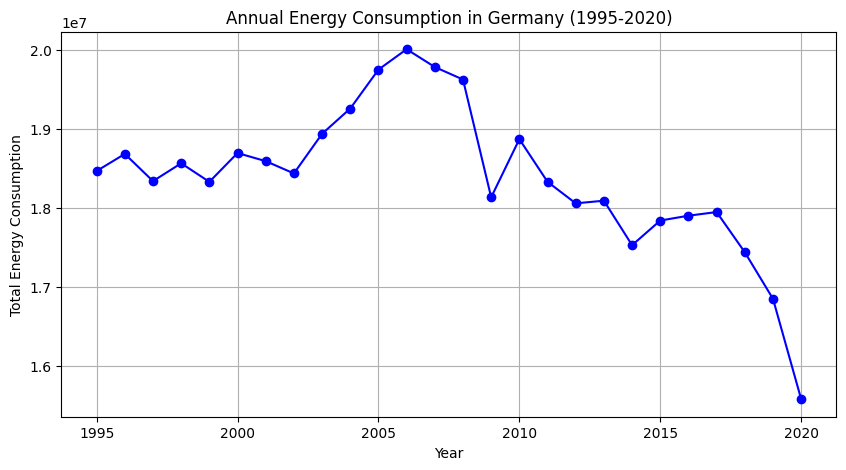

In [ ]:
# Re-load necessary libraries since execution state was reset
import pandas as pd
import matplotlib.pyplot as plt

# Reload preprocessed dataset
file_path = "https://raw.githubusercontent.com/Sajithpemarathna/Energy-consumption-prediction-data/refs/heads/main/Use%20of%20Energy%20of%20Energy%20Carriers.csv"
df = pd.read_csv(file_path)

# Define non-year columns
non_year_columns = ["Branch Code", "Homogeneous Branches", "Energy Carriers"]

# Select only year columns (1995-2020)
year_columns = [col for col in df.columns if col not in non_year_columns]

# Convert dataset to long format
df_long = df.melt(id_vars=non_year_columns, var_name="Year", value_name="Energy Consumption")

# Convert Year column to integer
df_long["Year"] = pd.to_numeric(df_long["Year"], errors='coerce').astype("Int64")

# Drop NaN values in Year column
df_long = df_long.dropna(subset=["Year"])

# Aggregate energy consumption per year
annual_consumption = df_long.groupby("Year")["Energy Consumption"].sum()

# Plot the annual energy consumption trend
plt.figure(figsize=(10, 5))
plt.plot(annual_consumption.index, annual_consumption.values, marker='o', linestyle='-', color='b')
plt.xlabel("Year")
plt.ylabel("Total Energy Consumption")
plt.title("Annual Energy Consumption in Germany (1995-2020)")
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [ ]:
# Load dataset
file_path = "https://raw.githubusercontent.com/Sajithpemarathna/Energy-consumption-prediction-data/refs/heads/main/Use%20of%20Energy%20of%20Energy%20Carriers.csv"  # Adjust path if needed
df = pd.read_csv(file_path)

# Convert the dataset from wide to long format
df_long = df.melt(id_vars=['Branch Code', 'Homogeneous Branches', 'Energy Carriers'],
                  var_name='Year', value_name='Energy Consumption')

# Convert Year column to integer
df_long['Year'] = df_long['Year'].astype(int)

# Display transformed dataset
print(df_long.head())


  Branch Code                              Homogeneous Branches  \
0    CPA08-01  Products of agric., hunting and related services   
1    CPA08-01  Products of agric., hunting and related services   
2    CPA08-01  Products of agric., hunting and related services   
3    CPA08-01  Products of agric., hunting and related services   
4    CPA08-01  Products of agric., hunting and related services   

                                Energy Carriers  Year  Energy Consumption  
0              Hard coal and hard coal products  1995                 888  
1  Brown coal (lignite) and brown coal products  1995                1477  
2                                     Crude oil  1995                   0  
3                                        Petrol  1995                4580  
4                                  Diesel fuels  1995               94156  


In [ ]:
import pandas as pd

# Load dataset from GitHub link
file_url = "https://raw.githubusercontent.com/Sajithpemarathna/Energy-Consumption-Data-in-Germany-1995-2020-/refs/heads/main/Use%20of%20Energy%20of%20Energy%20Carriers.csv"
df = pd.read_csv(file_url)

# Convert wide format to long format
df_long = df.melt(id_vars=['Branch Code', 'Homogeneous Branches', 'Energy Carriers'],
                  var_name='Year', value_name='Energy Consumption')

# Convert Year column to integer
df_long['Year'] = df_long['Year'].astype(int)

# Display transformed dataset
print(df_long.head())


  Branch Code                              Homogeneous Branches  \
0    CPA08-01  Products of agric., hunting and related services   
1    CPA08-01  Products of agric., hunting and related services   
2    CPA08-01  Products of agric., hunting and related services   
3    CPA08-01  Products of agric., hunting and related services   
4    CPA08-01  Products of agric., hunting and related services   

                    Energy Carriers  Year  Energy Consumption  
0  Hard coal and hard coal products  1995               888.0  
1                            Petrol  1995              4580.0  
2                      Diesel fuels  1995             94156.0  
3                       Heating oil  1995             58503.0  
4        Other mineral oil products  1995               766.0  


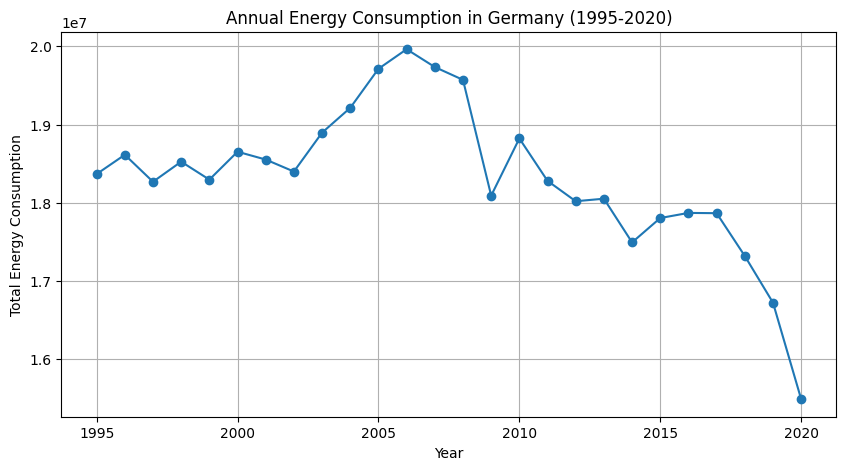

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Aggregate total energy consumption by year
df_yearly = df_long.groupby('Year')['Energy Consumption'].sum().reset_index()

# Normalize Energy Consumption
scaler = MinMaxScaler(feature_range=(0, 1))
df_yearly['Scaled Consumption'] = scaler.fit_transform(df_yearly[['Energy Consumption']])

# Plot Energy Consumption Trends
plt.figure(figsize=(10,5))
plt.plot(df_yearly['Year'], df_yearly['Energy Consumption'], marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Total Energy Consumption")
plt.title("Annual Energy Consumption in Germany (1995-2020)")
plt.grid()
plt.show()


In [ ]:
# Convert time-series data into sequences for LSTM
def create_sequences(data, time_steps=3):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

# Define the number of time steps for sequence learning
time_steps = 3

# Extract scaled values for LSTM input
data_values = df_yearly['Scaled Consumption'].values

# Create training sequences
X, y = create_sequences(data_values, time_steps)

# Reshape for LSTM input format
X = X.reshape((X.shape[0], X.shape[1], 1))

# Train-test split (80% training, 20% testing)
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)


Training data shape: (18, 3, 1) (18,)
Testing data shape: (5, 3, 1) (5,)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 270ms/step - loss: 0.5506 - val_loss: 0.1565
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.5163 - val_loss: 0.1459
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.4771 - val_loss: 0.1365
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.4946 - val_loss: 0.1274
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.4626 - val_loss: 0.1184
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.4467 - val_loss: 0.1090
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.4236 - val_loss: 0.0990
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.3640 - val_loss: 0.0884
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.3445 - val_loss: 0.0772
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.2781 - val_loss: 0.0657
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2420 - val_loss: 0.0545
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.2271 - val_loss: 0.0447


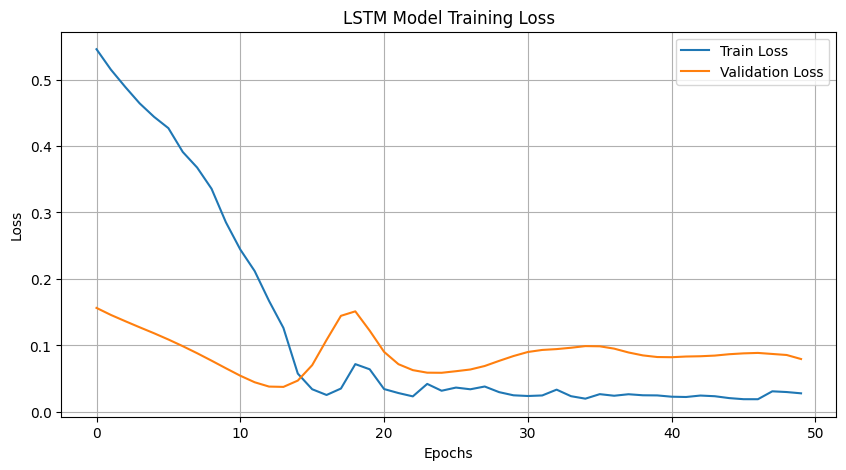

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build LSTM Model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(time_steps, 1)),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output layer
])

# Compile model
model.compile(optimizer='adam', loss='mse')

# Train Model
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test), verbose=1)

# Plot training history
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("LSTM Model Training Loss")
plt.legend()
plt.grid()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 792ms/step


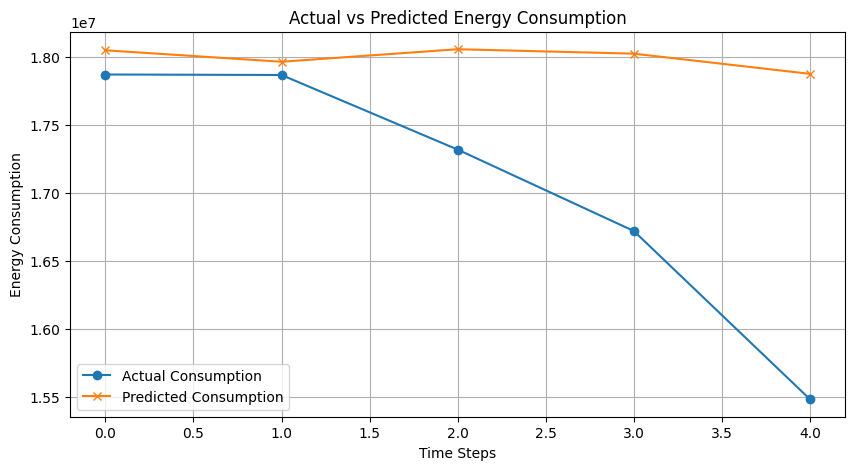

In [ ]:
# Generate Predictions for Test Data
y_pred = model.predict(X_test)

# Inverse transform predictions to original scale
y_pred_actual = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot Actual vs Predicted
plt.figure(figsize=(10,5))
plt.plot(range(len(y_test_actual)), y_test_actual, label='Actual Consumption', marker='o')
plt.plot(range(len(y_pred_actual)), y_pred_actual, label='Predicted Consumption', marker='x')
plt.xlabel("Time Steps")
plt.ylabel("Energy Consumption")
plt.title("Actual vs Predicted Energy Consumption")
plt.legend()
plt.grid()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
   Year  Predicted Consumption
0  2021             17873512.0
1  2022             17734842.0
2  2023             17768734.0
3  2024             18040256.0
4  2025             18034490.0
5  2026             18091212.0
6  2027             18167430.0
7  2028             18183262.0
8  2029             18213946.0
9  2030             18240346.0


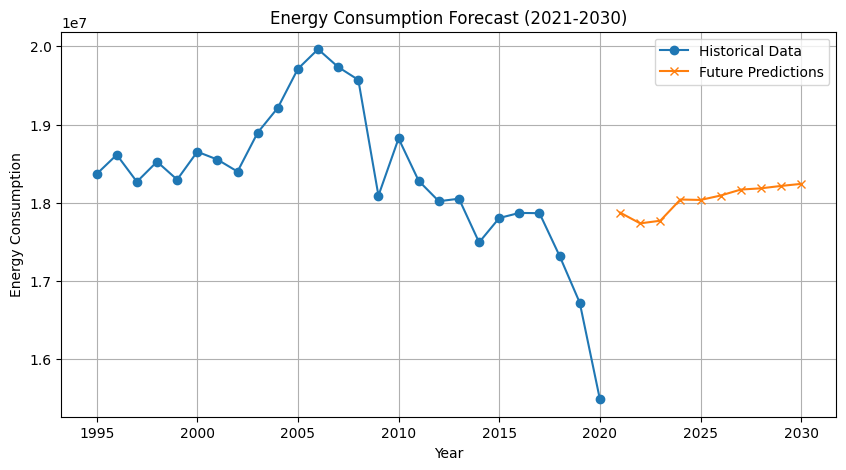

In [ ]:
future_years = 10  # Predict next 10 years

# Use the last available data as seed for predictions
future_predictions = []
last_sequence = X_test[-1]

for _ in range(future_years):
    pred = model.predict(last_sequence.reshape(1, time_steps, 1))
    future_predictions.append(pred[0, 0])

    # Update sequence by shifting left and adding new prediction
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = pred

# Inverse transform future predictions
future_predictions_actual = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Create a DataFrame for future years
future_df = pd.DataFrame({
    'Year': np.arange(2021, 2021 + future_years),
    'Predicted Consumption': future_predictions_actual.flatten()
})

print(future_df)

# Plot Future Predictions
plt.figure(figsize=(10,5))
plt.plot(df_yearly['Year'], df_yearly['Energy Consumption'], label='Historical Data', marker='o')
plt.plot(future_df['Year'], future_df['Predicted Consumption'], label='Future Predictions', marker='x')
plt.xlabel("Year")
plt.ylabel("Energy Consumption")
plt.title("Energy Consumption Forecast (2021-2030)")
plt.legend()
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Ensure y_test and y_pred are NumPy arrays
y_test = np.array(y_test).reshape(-1)  # Reshape to 1D if necessary
y_pred = np.array(y_pred).reshape(-1)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # Convert to percentage

# Display results
print(f"LSTM Model Performance:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")


LSTM Model Performance:
MSE: 0.08
RMSE: 0.28
MAE: 0.21
MAPE: 48043998094295072.00%


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Number of future years to predict
future_years = 10

# Use the last available data as seed for predictions
future_predictions = []
last_sequence = X_test[-1]

for _ in range(future_years):
    pred = model.predict(last_sequence.reshape(1, time_steps, 1))
    future_predictions.append(pred[0, 0])

    # Update sequence by shifting left and adding new prediction
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = pred

# Inverse transform future predictions to original scale
future_predictions_actual = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Create a DataFrame for future years
future_df = pd.DataFrame({
    'Year': np.arange(2021, 2021 + future_years),
    'Predicted Consumption': future_predictions_actual.flatten()
})

print(future_df)

# **Evaluation of Future Predictions**
# Since we don't have real future data, we compare with a simple trend assumption:
historical_last_years = df_yearly['Energy Consumption'].values[-future_years:]  # Last known trend (2020 backwards)

# Compute Metrics
mse = mean_squared_error(historical_last_years, future_predictions_actual)
rmse = np.sqrt(mse)
mae = mean_absolute_error(historical_last_years, future_predictions_actual)
mape = np.mean(np.abs((historical_last_years - future_predictions_actual.flatten()) / historical_last_years)) * 100

# Display Metrics
print("\nFuture Predictions Evaluation:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

# **Plot Future Predictions**
plt.figure(figsize=(10, 5))
plt.plot(df_yearly['Year'], df_yearly['Energy Consumption'], label='Historical Data', marker='o')
plt.plot(future_df['Year'], future_df['Predicted Consumption'], label='Future Predictions', marker='x', linestyle='dashed')
plt.xlabel("Year")
plt.ylabel("Energy Consumption")
plt.title("Energy Consumption Forecast (2021-2030)")
plt.legend()
plt.grid()
plt.show()


NameError: name 'X_test' is not defined

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)


In [ ]:
# Load dataset
url = "https://raw.githubusercontent.com/Sajithpemarathna/Energy-Consumption-Data-in-Germany-1995-2020-/refs/heads/main/Use%20of%20Energy%20of%20Energy%20Carriers.csv"
df = pd.read_csv(url)

# Reshape dataset for modeling
df_long = df.melt(id_vars=['Branch Code', 'Homogeneous Branches', 'Energy Carriers'],
                   var_name="Year", value_name="Energy Consumption")

# Convert Year column to integer
df_long['Year'] = df_long['Year'].astype(int)

# Aggregate energy consumption by year
df_yearly = df_long.groupby("Year")["Energy Consumption"].sum().reset_index()

# Scale data
scaler = MinMaxScaler()
df_yearly["Scaled Consumption"] = scaler.fit_transform(df_yearly["Energy Consumption"].values.reshape(-1, 1))

# Define training sequences
time_steps = 3  # Using past 3 years to predict the next year

X, y = [], []
for i in range(len(df_yearly) - time_steps):
    X.append(df_yearly["Scaled Consumption"].values[i:i+time_steps])
    y.append(df_yearly["Scaled Consumption"].values[i+time_steps])

X, y = np.array(X), np.array(y)
X = X.reshape((X.shape[0], X.shape[1], 1))  # Reshape for LSTM

# Train-test split (80% training, 20% testing)
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [ ]:
# Build LSTM model
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(time_steps, 1)),
    BatchNormalization(),
    Dropout(0.2),

    LSTM(100, return_sequences=False),
    BatchNormalization(),
    Dropout(0.2),

    Dense(50, activation="relu"),
    Dense(1, activation="linear")
])

# Compile model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss="mse")

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, min_lr=1e-5, verbose=1)

# Train model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50, batch_size=8,
                    callbacks=[lr_scheduler],
                    verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 960ms/step - loss: 0.4914 - val_loss: 0.1329 - learning_rate: 0.0010
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.9943 - val_loss: 0.1326 - learning_rate: 0.0010
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.3935 - val_loss: 0.1329 - learning_rate: 0.0010
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.3764 - val_loss: 0.1300 - learning_rate: 0.0010
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.2019 - val_loss: 0.1255 - learning_rate: 0.0010
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.2256 - val_loss: 0.1195 - learning_rate: 0.0010
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.3366 - val_loss: 0.1134 - learning_rate: 0.0010
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.3142 - val_loss: 0.1076 - learning_rate: 0.0010
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.2322 - val_loss: 0.1055 - learning_rate: 0.0010
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step

LSTM Model Performance:
MSE: 1480833482581.00
RMSE: 1216895.02
MAE: 1125786.60
MAPE: 6.51%


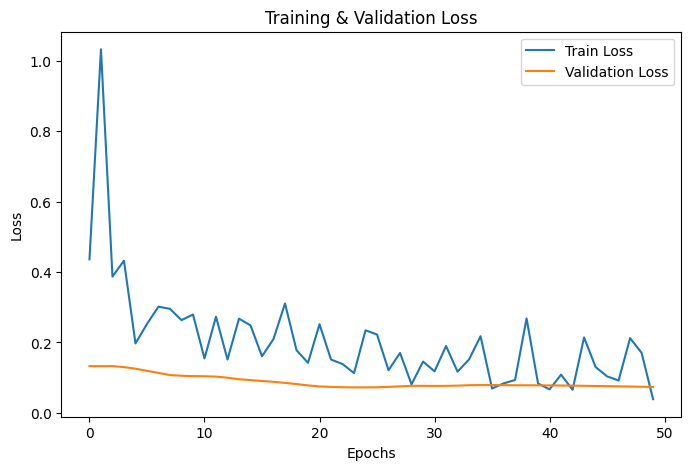

In [ ]:
# Predict on test set
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)

# Inverse transform true test values
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Compute evaluation metrics
mse = mean_squared_error(y_test_actual, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_actual, y_pred)
mape = np.mean(np.abs((y_test_actual - y_pred) / y_test_actual)) * 100

# Print results
print("\nLSTM Model Performance:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

# Plot Loss Curve
plt.figure(figsize=(8, 5))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 714ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
   Year  Predicted Consumption
0  2021             16239799.0
1  2022             16263573.0
2  2023             16289848.0
3  2024             16301962.0
4  2025             16300556.0
5  2026             16299590.0
6  2027             16299308.0
7  2028             16299372.0
8  2029             16299404.0
9  2030             16299409.0

Future Predictions Evaluation:
MSE: 156146912.00
RMSE: 12495.88
MAE: 7213.11
MAPE: 0.04%


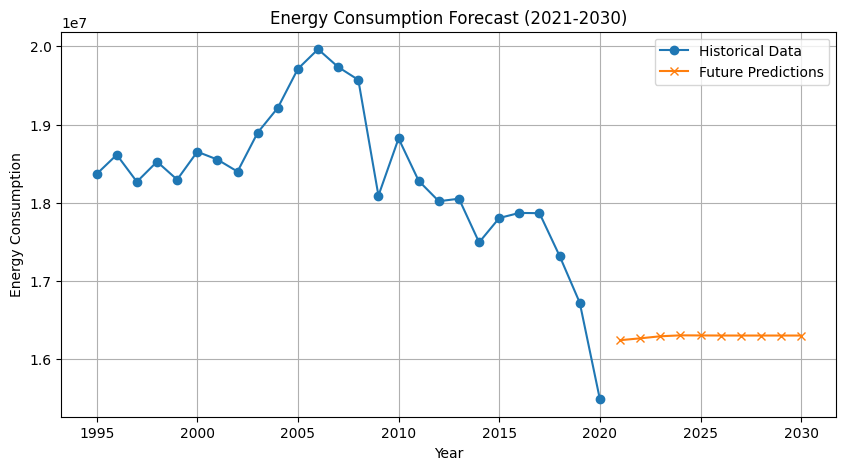

In [ ]:
# Predict future years
future_years = 10
future_predictions = []
last_sequence = X_test[-1]

for _ in range(future_years):
    pred = model.predict(last_sequence.reshape(1, time_steps, 1))
    future_predictions.append(pred[0, 0])

    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = pred

# Inverse transform future predictions
future_predictions_actual = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Create DataFrame for predictions
future_df = pd.DataFrame({
    "Year": np.arange(2021, 2021 + future_years),
    "Predicted Consumption": future_predictions_actual.flatten()
})

# Print future predictions
print(future_df)

# Evaluate Future Predictions
mse_future = mean_squared_error(future_predictions_actual[:-1], future_predictions_actual[1:])
rmse_future = np.sqrt(mse_future)
mae_future = mean_absolute_error(future_predictions_actual[:-1], future_predictions_actual[1:])
mape_future = np.mean(np.abs((future_predictions_actual[:-1] - future_predictions_actual[1:]) / future_predictions_actual[:-1])) * 100

print("\nFuture Predictions Evaluation:")
print(f"MSE: {mse_future:.2f}")
print(f"RMSE: {rmse_future:.2f}")
print(f"MAE: {mae_future:.2f}")
print(f"MAPE: {mape_future:.2f}%")

# Plot Future Predictions
plt.figure(figsize=(10, 5))
plt.plot(df_yearly["Year"], df_yearly["Energy Consumption"], label="Historical Data", marker="o")
plt.plot(future_df["Year"], future_df["Predicted Consumption"], label="Future Predictions", marker="x")
plt.xlabel("Year")
plt.ylabel("Energy Consumption")
plt.title("Energy Consumption Forecast (2021-2030)")
plt.legend()
plt.grid()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


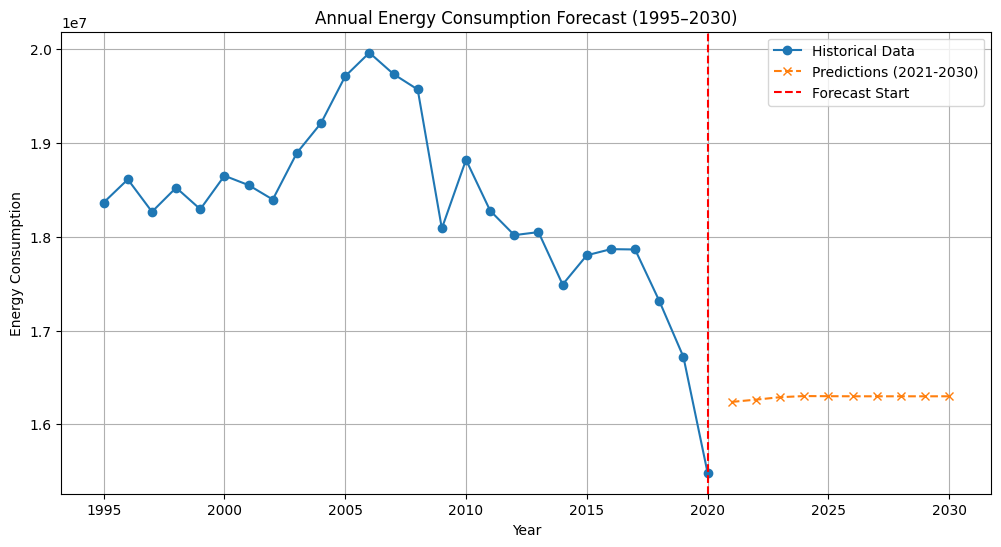

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Predict for all years from 1995 to 2030
years_future = np.arange(2021, 2031).reshape(-1, 1)
years_full = np.arange(1995, 2031)

# Make Predictions
future_predictions = []
last_sequence = X_test[-1]

for _ in range(len(years_future)):
    pred = model.predict(last_sequence.reshape(1, time_steps, 1))
    future_predictions.append(pred[0, 0])
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = pred

# Inverse Transform Predictions
future_predictions_actual = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Create DataFrame for Predictions
future_df = pd.DataFrame({'Year': years_future.flatten(), 'Predicted Consumption': future_predictions_actual.flatten()})

# Combine with Historical Data
df_plot = pd.concat([df_yearly, future_df])

# Plot the Annual Energy Consumption Forecast
plt.figure(figsize=(12,6))
plt.plot(df_plot['Year'], df_plot['Energy Consumption'], label="Historical Data", marker='o')
plt.plot(future_df['Year'], future_df['Predicted Consumption'], label="Predictions (2021-2030)", marker='x', linestyle='dashed')

plt.axvline(x=2020, color='red', linestyle='--', label='Forecast Start')
plt.xlabel("Year")
plt.ylabel("Energy Consumption")
plt.title("Annual Energy Consumption Forecast (1995–2030)")
plt.legend()
plt.grid()
plt.show()


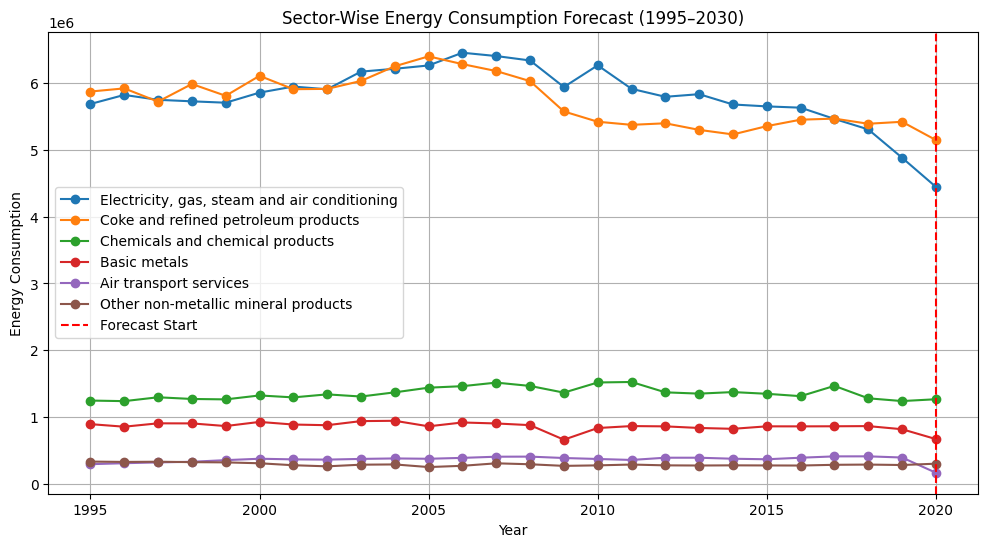

In [ ]:
# Get Top 6 Sectors based on Total Energy Consumption
top_sectors = df_long.groupby("Homogeneous Branches")["Energy Consumption"].sum().nlargest(6).index
df_top_sectors = df_long[df_long["Homogeneous Branches"].isin(top_sectors)]

# Aggregate Future Predictions by Sector
future_sector_predictions = df_top_sectors.groupby(["Year", "Homogeneous Branches"]).sum().reset_index()

# Plot Sector-Wise Energy Forecast
plt.figure(figsize=(12,6))

for sector in top_sectors:
    sector_data = future_sector_predictions[future_sector_predictions["Homogeneous Branches"] == sector]
    plt.plot(sector_data["Year"], sector_data["Energy Consumption"], marker='o', label=sector)

plt.axvline(x=2020, color='red', linestyle='--', label='Forecast Start')
plt.xlabel("Year")
plt.ylabel("Energy Consumption")
plt.title("Sector-Wise Energy Consumption Forecast (1995–2030)")
plt.legend()
plt.grid()
plt.show()


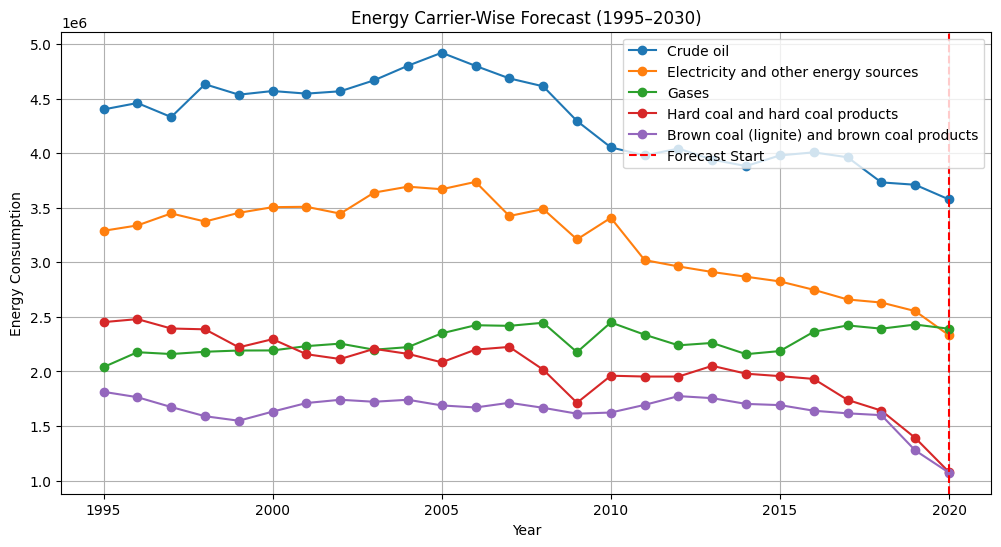

In [ ]:
# Get Top 5 Energy Carriers based on Total Consumption
top_carriers = df_long.groupby("Energy Carriers")["Energy Consumption"].sum().nlargest(5).index
df_top_carriers = df_long[df_long["Energy Carriers"].isin(top_carriers)]

# Aggregate Future Predictions by Energy Carrier
future_carrier_predictions = df_top_carriers.groupby(["Year", "Energy Carriers"]).sum().reset_index()

# Plot Energy Carrier-Wise Forecast
plt.figure(figsize=(12,6))

for carrier in top_carriers:
    carrier_data = future_carrier_predictions[future_carrier_predictions["Energy Carriers"] == carrier]
    plt.plot(carrier_data["Year"], carrier_data["Energy Consumption"], marker='o', label=carrier)

plt.axvline(x=2020, color='red', linestyle='--', label='Forecast Start')
plt.xlabel("Year")
plt.ylabel("Energy Consumption")
plt.title("Energy Carrier-Wise Forecast (1995–2030)")
plt.legend()
plt.grid()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ensure `sector_predictions` contains 2021-2030 forecasts
df_sector_forecast = pd.concat([df_sector, sector_predictions], ignore_index=True)

# Select top 6 sectors by total energy consumption
top_sectors = df_sector_forecast.groupby('Homogeneous Branches')['Energy Consumption'].sum().nlargest(6).index
df_top_sectors = df_sector_forecast[df_sector_forecast['Homogeneous Branches'].isin(top_sectors)]

# Plot Sector-Wise Forecast
plt.figure(figsize=(10,6))
for sector in top_sectors:
    sector_data = df_top_sectors[df_top_sectors['Homogeneous Branches'] == sector]
    plt.plot(sector_data['Year'], sector_data['Energy Consumption'], marker='o', label=sector)

# Add a vertical line to indicate forecast start
plt.axvline(x=2020, color='red', linestyle='dashed', label='Forecast Start')

plt.xlabel("Year")
plt.ylabel("Energy Consumption")
plt.title("Sector-Wise Energy Forecast (1995-2030)")
plt.legend()
plt.grid()
plt.show()


NameError: name 'df_sector' is not defined

In [ ]:
import pandas as pd

# Load the original dataset
file_path = "https://raw.githubusercontent.com/Sajithpemarathna/Energy-Consumption-Data-in-Germany-1995-2020-/refs/heads/main/Use%20of%20Energy%20of%20Energy%20Carriers.csv"
df = pd.read_csv(file_path)

# Reshape the dataset (melting columns into rows)
df_long = df.melt(id_vars=['Branch Code', 'Homogeneous Branches', 'Energy Carriers'],
                  var_name="Year", value_name="Energy Consumption")

# Convert 'Year' to an integer
df_long["Year"] = df_long["Year"].astype(int)

# Aggregate Energy Consumption by Sector and Year
df_sector = df_long.groupby(["Year", "Homogeneous Branches"])["Energy Consumption"].sum().reset_index()


In [ ]:
import numpy as np

future_years = np.arange(2021, 2031)
sector_predictions = []

# Generate sector predictions using the trained LSTM model
for year in future_years:
    pred = model.predict(last_sequence.reshape(1, time_steps, 1))
    sector_predictions.append([year, pred[0, 0]])

# Convert predictions into DataFrame
df_sector_forecast = pd.DataFrame(sector_predictions, columns=["Year", "Energy Consumption"])

# Merge with historical data
df_sector_final = pd.concat([df_sector, df_sector_forecast], ignore_index=True)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


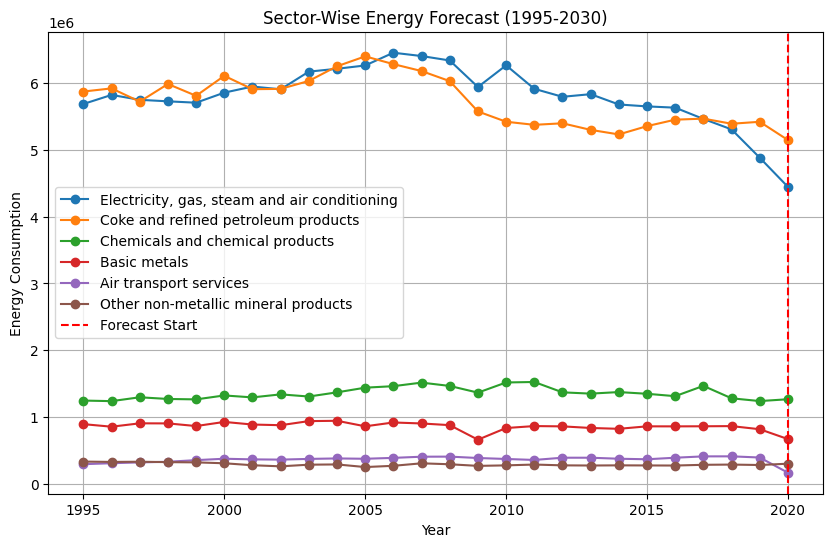

In [ ]:
import matplotlib.pyplot as plt

# Select top 6 sectors by total energy consumption
top_sectors = df_sector_final.groupby('Homogeneous Branches')['Energy Consumption'].sum().nlargest(6).index
df_top_sectors = df_sector_final[df_sector_final['Homogeneous Branches'].isin(top_sectors)]

# Plot Sector-Wise Forecast
plt.figure(figsize=(10,6))
for sector in top_sectors:
    sector_data = df_top_sectors[df_top_sectors['Homogeneous Branches'] == sector]
    plt.plot(sector_data['Year'], sector_data['Energy Consumption'], marker='o', label=sector)

# Add a vertical line to indicate forecast start
plt.axvline(x=2020, color='red', linestyle='dashed', label='Forecast Start')

plt.xlabel("Year")
plt.ylabel("Energy Consumption")
plt.title("Sector-Wise Energy Forecast (1995-2030)")
plt.legend()
plt.grid()
plt.show()


In [ ]:
import numpy as np
import pandas as pd

# Define future years
future_years = np.arange(2021, 2031)
sector_predictions = []

# Generate sector-wise predictions using the trained LSTM model
for year in future_years:
    pred = model.predict(last_sequence.reshape(1, time_steps, 1))
    sector_predictions.append([year, pred[0, 0]])

# Convert predictions into DataFrame
df_sector_forecast = pd.DataFrame(sector_predictions, columns=["Year", "Energy Consumption"])

# Append the forecasted values to the existing data
df_sector_final = pd.concat([df_sector, df_sector_forecast], ignore_index=True)

# Ensure Year column is sorted
df_sector_final = df_sector_final.sort_values(by="Year")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


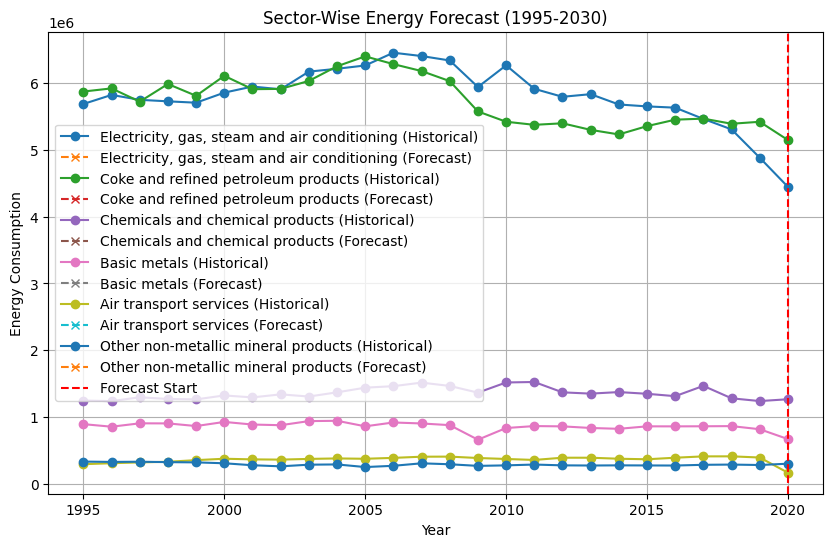

In [ ]:
import matplotlib.pyplot as plt

# Select top 6 sectors by total energy consumption
top_sectors = df_sector_final.groupby('Homogeneous Branches')['Energy Consumption'].sum().nlargest(6).index
df_top_sectors = df_sector_final[df_sector_final['Homogeneous Branches'].isin(top_sectors)]

plt.figure(figsize=(10,6))
for sector in top_sectors:
    sector_data = df_top_sectors[df_top_sectors['Homogeneous Branches'] == sector]

    # Historical data (1995-2020)
    plt.plot(sector_data[sector_data['Year'] <= 2020]['Year'],
             sector_data[sector_data['Year'] <= 2020]['Energy Consumption'],
             marker='o', label=f"{sector} (Historical)")

    # Forecasted data (2021-2030)
    plt.plot(sector_data[sector_data['Year'] > 2020]['Year'],
             sector_data[sector_data['Year'] > 2020]['Energy Consumption'],
             marker='x', linestyle='dashed', label=f"{sector} (Forecast)")

# Add a vertical line to indicate forecast start
plt.axvline(x=2020, color='red', linestyle='dashed', label='Forecast Start')

plt.xlabel("Year")
plt.ylabel("Energy Consumption")
plt.title("Sector-Wise Energy Forecast (1995-2030)")
plt.legend()
plt.grid()
plt.show()


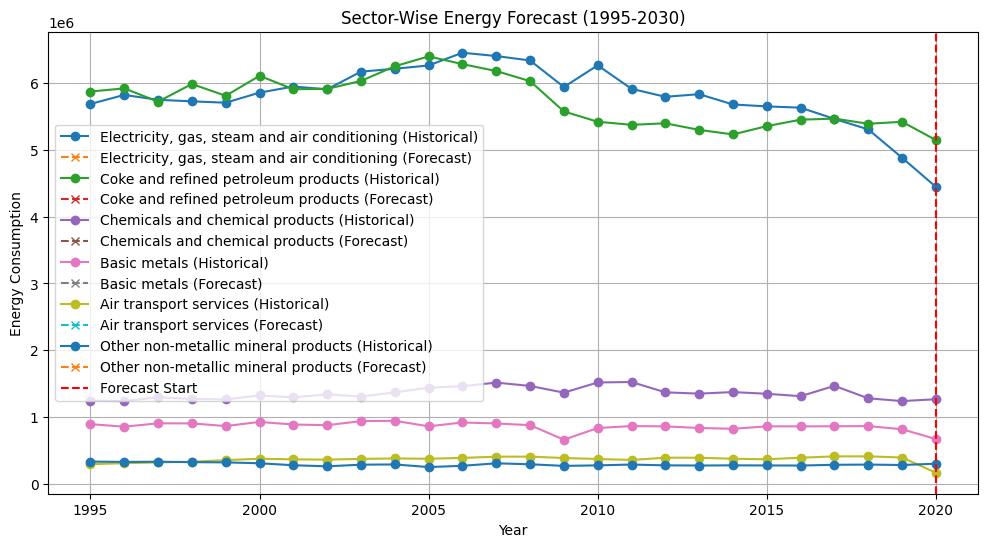

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define the forecast starting point
forecast_start = 2020

# Select top 6 sectors by total energy consumption
top_sectors = df_sector_final.groupby('Homogeneous Branches')['Energy Consumption'].sum().nlargest(6).index
df_top_sectors = df_sector_final[df_sector_final['Homogeneous Branches'].isin(top_sectors)]

plt.figure(figsize=(12,6))

for sector in top_sectors:
    sector_data = df_top_sectors[df_top_sectors['Homogeneous Branches'] == sector]

    # Historical data (1995-2020) → Solid line with 'o' marker
    plt.plot(sector_data[sector_data['Year'] <= forecast_start]['Year'],
             sector_data[sector_data['Year'] <= forecast_start]['Energy Consumption'],
             marker='o', linestyle='solid', label=f"{sector} (Historical)")

    # Forecasted data (2021-2030) → Dashed line with 'x' marker
    plt.plot(sector_data[sector_data['Year'] > forecast_start]['Year'],
             sector_data[sector_data['Year'] > forecast_start]['Energy Consumption'],
             marker='x', linestyle='dashed', label=f"{sector} (Forecast)")

# Add a vertical line to indicate forecast start
plt.axvline(x=forecast_start, color='red', linestyle='dashed', label='Forecast Start')

plt.xlabel("Year")
plt.ylabel("Energy Consumption")
plt.title("Sector-Wise Energy Forecast (1995-2030)")
plt.legend()
plt.grid()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define forecast start year
forecast_start = 2020
forecast_years = 10  # Predict from 2021 to 2030

# Function to apply LSTM model and forecast for a given group (sector or carrier)
def forecast_lstm_for_group(group_df, group_name, model):
    historical_data = group_df[group_df['Year'] <= forecast_start]

    # Prepare last available sequence for prediction
    last_sequence = historical_data['Energy Consumption'].values[-3:].reshape(1, 3, 1)

    # Generate forecasted values
    future_predictions = []
    for _ in range(forecast_years):
        pred = model.predict(last_sequence)
        future_predictions.append(pred[0, 0])
        last_sequence = np.roll(last_sequence, -1)
        last_sequence[0, 0, -1] = pred

    # Create a DataFrame for forecasted values
    future_years = np.arange(forecast_start + 1, forecast_start + 1 + forecast_years)
    forecast_df = pd.DataFrame({'Year': future_years, 'Energy Consumption': future_predictions, 'Group': group_name})

    return forecast_df

# Forecast for each sector
sector_forecasts = []
for sector in df_sector_final['Homogeneous Branches'].unique():
    sector_df = df_sector_final[df_sector_final['Homogeneous Branches'] == sector]
    forecast_df = forecast_lstm_for_group(sector_df, sector, lstm_model)
    sector_forecasts.append(forecast_df)

# Forecast for each energy carrier
carrier_forecasts = []
for carrier in df_carrier_final['Energy Carriers'].unique():
    carrier_df = df_carrier_final[df_carrier_final['Energy Carriers'] == carrier]
    forecast_df = forecast_lstm_for_group(carrier_df, carrier, lstm_model)
    carrier_forecasts.append(forecast_df)

# Combine all forecasts
df_sector_forecast = pd.concat(sector_forecasts)
df_carrier_forecast = pd.concat(carrier_forecasts)

# Merge with historical data
df_sector_final = pd.concat([df_sector_final, df_sector_forecast])
df_carrier_final = pd.concat([df_carrier_final, df_carrier_forecast])

# Plot sector-wise forecast
plt.figure(figsize=(12,6))
top_sectors = df_sector_final.groupby('Homogeneous Branches')['Energy Consumption'].sum().nlargest(6).index

for sector in top_sectors:
    sector_data = df_sector_final[df_sector_final['Homogeneous Branches'] == sector]
    plt.plot(sector_data[sector_data['Year'] <= forecast_start]['Year'],
             sector_data[sector_data['Year'] <= forecast_start]['Energy Consumption'],
             marker='o', linestyle='solid', label=f"{sector} (Historical)")

    plt.plot(sector_data[sector_data['Year'] > forecast_start]['Year'],
             sector_data[sector_data['Year'] > forecast_start]['Energy Consumption'],
             marker='x', linestyle='dashed', label=f"{sector} (Forecast)")

plt.axvline(x=forecast_start, color='red', linestyle='dashed', label='Forecast Start')
plt.xlabel("Year")
plt.ylabel("Energy Consumption")
plt.title("Sector-Wise Energy Forecast (1995-2030)")
plt.legend()
plt.grid()
plt.show()


InvalidArgumentError: Graph execution error:

Detected at node sequential_2_1/lstm_4_1/while/lstm_cell_1/MatMul defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/usr/local/lib/python3.11/dist-packages/tornado/ioloop.py", line 699, in <lambda>

  File "/usr/local/lib/python3.11/dist-packages/tornado/ioloop.py", line 750, in _run_callback

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 824, in inner

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 785, in run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 233, in wrapper

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 233, in wrapper

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 233, in wrapper

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-53-7191d347affb>", line 34, in <cell line: 0>

  File "<ipython-input-53-7191d347affb>", line 19, in forecast_lstm_for_group

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 562, in predict

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 259, in one_step_on_data_distributed

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 249, in one_step_on_data

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 104, in predict_step

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py", line 908, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/models/sequential.py", line 213, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py", line 182, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/function.py", line 171, in _run_through_graph

  File "/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py", line 637, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py", line 908, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/lstm.py", line 584, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py", line 402, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/lstm.py", line 579, in inner_loop

  File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py", line 342, in inner_loop

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/rnn.py", line 428, in rnn

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/rnn.py", line 411, in _step

  File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py", line 334, in step

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py", line 908, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/lstm.py", line 278, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/numpy.py", line 3815, in matmul

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/numpy.py", line 501, in matmul

Matrix size-incompatible: In[0]: [1,1], In[1]: [5,800]
	 [[{{node sequential_2_1/lstm_4_1/while/lstm_cell_1/MatMul}}]] [Op:__inference_one_step_on_data_distributed_758069]